In [1]:
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

## appendicitis
7 medical measures taken over 106 patients on which the class label represents if the patient has appendicitis (class label 1) or not (class label 0).

In [2]:
with open('datasets/appendicitis.dat', "r") as file:
    lines = file.readlines()

data_start_ind = lines.index("@data\n") + 1
app_data = lines[data_start_ind:]
app_data = pd.read_csv(StringIO("".join(app_data)), header=None)

app_data.columns = ["At1", "At2", "At3", "At4", "At5", "At6", "At7", "Class"]

app_X = app_data.iloc[:, :-1]
app_y = app_data.iloc[:, -1]

print("num observations: ", app_y.count())
print("target distribution: ", app_y.value_counts())


app_X.describe()


num observations:  106
target distribution:  Class
0    85
1    21
Name: count, dtype: int64


,At1,At2,At3,At4,At5,At6,At7
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.398491,0.682104,0.415151,0.208745,0.169151,0.676349,0.375396
std,0.191452,0.207134,0.205799,0.199650,0.177329,0.218909,0.198132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244750,0.589000,0.277000,0.056000,0.049250,0.576000,0.238000
50%,0.413000,0.750000,0.442500,0.146000,0.113000,0.744000,0.397500
75%,0.505750,0.821000,0.545500,0.302500,0.226750,0.831250,0.486750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='RSS')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

'from scorecard import Scorecard\nimport time\n\nstart_time = time.time()\nscorecard = Scorecard()\napp_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, \n                thresholds_method=\'CAIM\',\n                encoding_method=\'1_OUT_OF_K\', \n                model_method=\'RSS\')\nscorecard.cross_val_score()\nend_time = time.time()\nprint(f"Execution time: {end_time - start_time} seconds")'

In [4]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

'from scorecard import Scorecard\nimport time\n\nstart_time = time.time()\nscorecard = Scorecard()\napp_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, \n                thresholds_method=\'CAIM\',\n                encoding_method=\'1_OUT_OF_K\', \n                model_method=\'MM\')\nscorecard.cross_val_score()\nend_time = time.time()\nprint(f"Execution time: {end_time - start_time} seconds")'

In [5]:
categorical_columns = app_X.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    app_X[col] = app_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {app_X[col].unique()}")

Categorical columns:  []



discretization thresholds
# 0  GLOBAL CAIM  30.528645833333332
# 1  GLOBAL CAIM  31.055072463768116
# 2  GLOBAL CAIM  31.143656716417908
# 3  GLOBAL CAIM  26.656698564593302
# 4  GLOBAL CAIM  28.316964285714285
# 5  GLOBAL CAIM  30.528645833333332
# 6  GLOBAL CAIM  32.035547785547784

thresholds  {'At1': [0.0, 0.204, 0.884], 'At2': [0.0, 0.411, 0.964], 'At3': [0.0, 0.153, 0.927], 'At4': [0.0, 0.056, 1.0], 'At5': [0.0, 0.033, 0.784], 'At6': [0.0, 0.506, 0.956], 'At7': [0.0, 0.145, 0.837]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding
X_disc shape:  (79, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-bin1',
       'featAt2-bin2', 'featAt2-bin3', 'featAt3-bin1', 'featAt3-bin2',
       'featAt3-bin3', 'featAt4-bin1', 'featAt4-bin2', 'featAt4-bin3',
       'featAt5-bin1', 'featAt5-bin2', 'featAt5-bin3', 'featAt6-bin1',
       'featAt6-bin2', 'featAt6-bin3', 'featAt7-bin1', 'featAt7-bin2',
       'featAt7-bin3'],

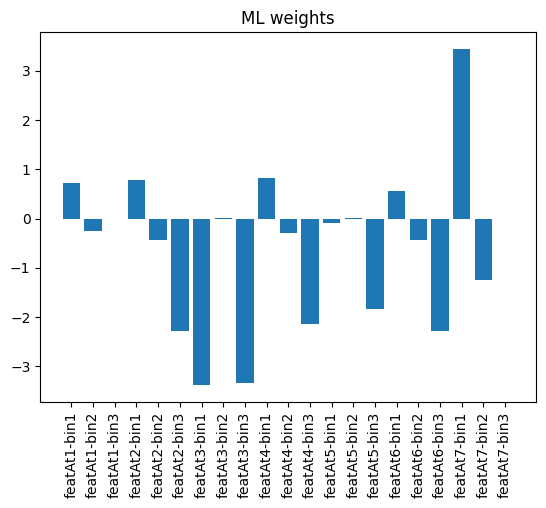


evaluate
encoding test set
X_disc shape:  (27, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-bin1',
       'featAt2-bin2', 'featAt2-bin3', 'featAt3-bin1', 'featAt3-bin2',
       'featAt3-bin3', 'featAt4-bin1', 'featAt4-bin2', 'featAt4-bin3',
       'featAt5-bin1', 'featAt5-bin2', 'featAt5-bin3', 'featAt6-bin1',
       'featAt6-bin2', 'featAt6-bin3', 'featAt7-bin1', 'featAt7-bin2',
       'featAt7-bin3'],
      dtype='object')
X_disc head:     featAt1-bin1  featAt1-bin2  featAt1-bin3  featAt2-bin1  featAt2-bin2  \
0             0             1             0             0             1   
1             1             0             0             0             1   
2             0             1             0             0             1   
3             0             1             0             0             1   
4             0             1             0             0             1   

   featAt2-bin3  featAt3-bin1  featAt3-bin2  featAt3-bin3  featAt

In [6]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [7]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 21


In [8]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  30.528645833333332
# 1  GLOBAL CAIM  31.055072463768116
# 2  GLOBAL CAIM  31.143656716417908
# 3  GLOBAL CAIM  26.656698564593302
# 4  GLOBAL CAIM  28.316964285714285
# 5  GLOBAL CAIM  30.528645833333332
# 6  GLOBAL CAIM  32.035547785547784

thresholds  {'At1': [0.0, 0.204, 0.884], 'At2': [0.0, 0.411, 0.964], 'At3': [0.0, 0.153, 0.927], 'At4': [0.0, 0.056, 1.0], 'At5': [0.0, 0.033, 0.784], 'At6': [0.0, 0.506, 0.956], 'At7': [0.0, 0.145, 0.837]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding
X_disc shape:  (79, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-bin1',
       'featAt2-bin2', 'featAt2-bin3', 'featAt3-bin1', 'featAt3-bin2',
       'featAt3-bin3', 'featAt4-bin1', 'featAt4-bin2', 'featAt4-bin3',
       'featAt5-bin1', 'featAt5-bin2', 'featAt5-bin3', 'featAt6-bin1',
       'featAt6-bin2', 'featAt6-bin3', 'featAt7-bin1', 'featAt7-bin2',
       'featAt7-bin3'],

In [9]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  30.528645833333332
# 1  GLOBAL CAIM  31.055072463768116
# 2  GLOBAL CAIM  31.143656716417908
# 3  GLOBAL CAIM  26.656698564593302
# 4  GLOBAL CAIM  28.316964285714285
# 5  GLOBAL CAIM  30.528645833333332
# 6  GLOBAL CAIM  32.035547785547784

thresholds  {'At1': [0.0, 0.204, 0.884], 'At2': [0.0, 0.411, 0.964], 'At3': [0.0, 0.153, 0.927], 'At4': [0.0, 0.056, 1.0], 'At5': [0.0, 0.033, 0.784], 'At6': [0.0, 0.506, 0.956], 'At7': [0.0, 0.145, 0.837]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding
X_disc shape:  (79, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-bin1',
       'featAt2-bin2', 'featAt2-bin3', 'featAt3-bin1', 'featAt3-bin2',
       'featAt3-bin3', 'featAt4-bin1', 'featAt4-bin2', 'featAt4-bin3',
       'featAt5-bin1', 'featAt5-bin2', 'featAt5-bin3', 'featAt6-bin1',
       'featAt6-bin2', 'featAt6-bin3', 'featAt7-bin1', 'featAt7-bin2',
       'featAt7-bin3'],


discretization thresholds

thresholds  {'At1': [0.0135, 0.0445, 0.0755, 0.0935, 0.1, 0.109, 0.118, 0.131, 0.16449999999999998, 0.189, 0.1955, 0.202, 0.2085, 0.2175, 0.22899999999999998, 0.2535, 0.27749999999999997, 0.291, 0.3, 0.311, 0.3355, 0.3555, 0.362, 0.3665, 0.3735, 0.3845, 0.3935, 0.398, 0.40449999999999997, 0.411, 0.4155, 0.42, 0.4245, 0.4335, 0.4445, 0.4535, 0.46, 0.4645, 0.469, 0.4755, 0.4845, 0.491, 0.4975, 0.5045, 0.5115000000000001, 0.52, 0.531, 0.547, 0.5645, 0.582, 0.602, 0.6174999999999999, 0.651, 0.7155, 0.7575000000000001, 0.78, 0.8400000000000001], 'At2': [0.0805, 0.16999999999999998, 0.1875, 0.21400000000000002, 0.241, 0.259, 0.3215, 0.393, 0.42, 0.4465, 0.473, 0.491, 0.509, 0.5445, 0.58, 0.598, 0.616, 0.634, 0.652, 0.67, 0.6965, 0.723, 0.741, 0.759, 0.777, 0.795, 0.8125, 0.83, 0.848, 0.866, 0.884, 0.902, 0.92, 0.9375, 0.955], 'At3': [0.011, 0.0335, 0.0475, 0.053500000000000006, 0.0665, 0.0905, 0.108, 0.1125, 0.1185, 0.1275, 0.14250000000000002, 0.1535, 0.1555, 0.1

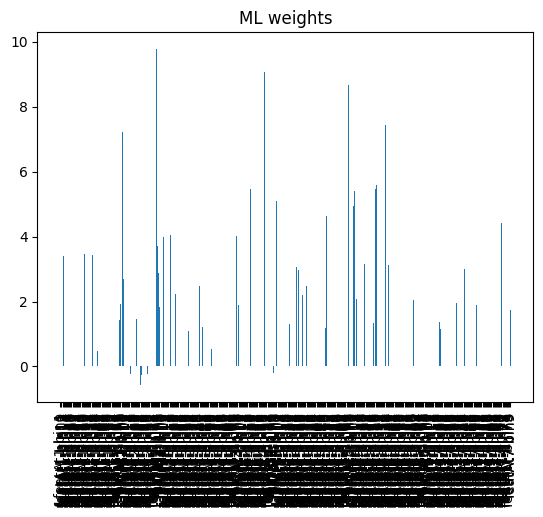

num of zero weights:  345
num of non-zero weights:  60
           Feature    Weight
3    featAt1-bin12  3.398910
15   featAt1-bin23  8.972364
22    featAt1-bin3  3.450425
29   featAt1-bin36  3.441091
33    featAt1-bin4  0.475535
53    featAt1-bin6  1.425016
54    featAt1-bin7  1.921696
56    featAt1-bin9  7.211228
57    featAt2-bin1  2.682367
63   featAt2-bin15 -0.239663
67   featAt2-bin19  4.934227
68    featAt2-bin2  1.463074
72   featAt2-bin23 -0.576495
73   featAt2-bin24 -0.261218
78   featAt2-bin29 -0.227348
86    featAt2-bin4  9.779307
87    featAt2-bin5  3.713629
88    featAt2-bin6  2.889228
89    featAt2-bin7  1.843797
93   featAt3-bin10  3.999165
99   featAt3-bin16  4.058672
103   featAt3-bin2  2.223963
115  featAt3-bin30  1.097862
125   featAt3-bin4  2.475511
128  featAt3-bin42  1.227044
136   featAt3-bin5  0.531048
158   featAt3-bin7  4.017871
160   featAt3-bin9  1.896850
171  featAt4-bin19  5.473223
183   featAt4-bin3  9.060465
191   featAt4-bin6 -0.197115
194   featAt4-bin

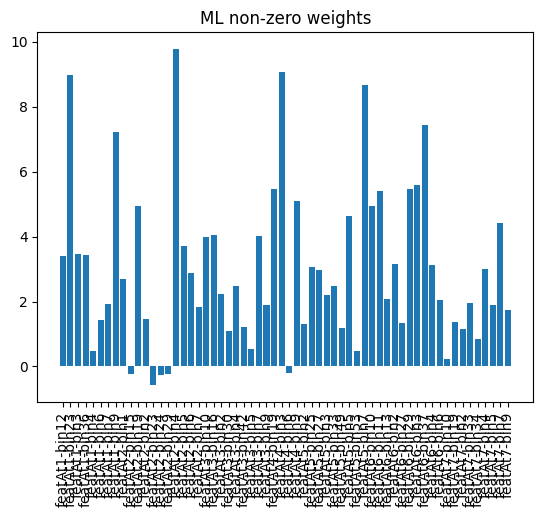


evaluate
encoding test set
X_disc shape:  (27, 405)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin10', 'featAt1-bin11', 'featAt1-bin12',
       'featAt1-bin13', 'featAt1-bin14', 'featAt1-bin15', 'featAt1-bin16',
       'featAt1-bin17', 'featAt1-bin18',
       ...
       'featAt7-bin69', 'featAt7-bin7', 'featAt7-bin70', 'featAt7-bin71',
       'featAt7-bin72', 'featAt7-bin73', 'featAt7-bin74', 'featAt7-bin75',
       'featAt7-bin8', 'featAt7-bin9'],
      dtype='object', length=405)
X_disc head:     featAt1-bin1  featAt1-bin10  featAt1-bin11  featAt1-bin12  featAt1-bin13  \
0             0              0              0              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0              0              0   
4             0              0              0              0              0   

   featAt1-bin14 

In [9]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_1ook_ml_model, app_infbins_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=13)
_, infbins_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

CAIM, accuracy: 0.8148148148148148, sparsity: 20
threshold: 0.1, accuracy: 0.3333333333333333, sparsity: 60
threshold: 0.01, accuracy: 0.3333333333333333, sparsity: 60
threshold: 0.001, accuracy: 0.3333333333333333, sparsity: 60
threshold: 0.0001, accuracy: 0.3333333333333333, sparsity: 60
threshold: 0, accuracy: 0.3333333333333333, sparsity: 60
infbins, accuracy: 0.8148148148148148, sparsity: 60


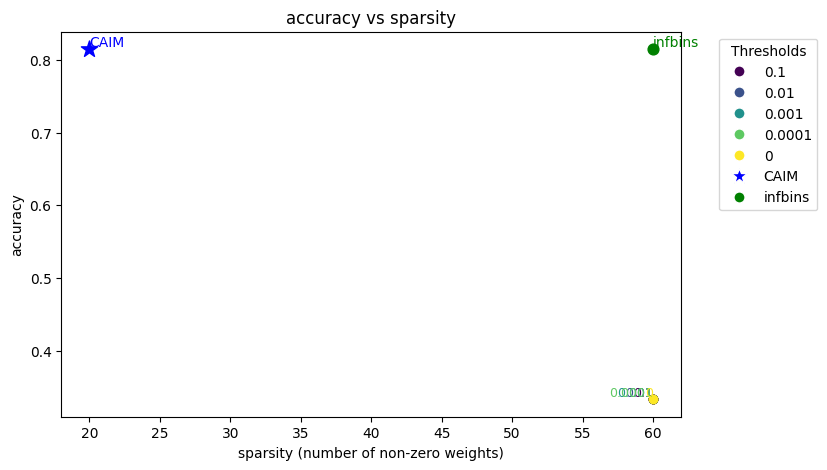

In [10]:
scorecard.plot_accuracy_vs_sparsity(caim_accuracy, num_nonzero_weights, infbins_accuracy, scorecard.nonzero_weights.shape[0])


discretization thresholds
# 0  GLOBAL CAIM  30.528645833333332
# 1  GLOBAL CAIM  31.055072463768116
# 2  GLOBAL CAIM  31.143656716417908
# 3  GLOBAL CAIM  26.656698564593302
# 4  GLOBAL CAIM  28.316964285714285
# 5  GLOBAL CAIM  30.528645833333332
# 6  GLOBAL CAIM  32.035547785547784

thresholds  {'At1': [0.0, 0.204, 0.884], 'At2': [0.0, 0.411, 0.964], 'At3': [0.0, 0.153, 0.927], 'At4': [0.0, 0.056, 1.0], 'At5': [0.0, 0.033, 0.784], 'At6': [0.0, 0.506, 0.956], 'At7': [0.0, 0.145, 0.837]}
num of bins: 
  At1: 4
  At2: 4
  At3: 4
  At4: 4
  At5: 4
  At6: 4
  At7: 4

encoding
X_disc shape:  (79, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-bin1',
       'featAt2-bin2', 'featAt2-bin3', 'featAt3-bin1', 'featAt3-bin2',
       'featAt3-bin3', 'featAt4-bin1', 'featAt4-bin2', 'featAt4-bin3',
       'featAt5-bin1', 'featAt5-bin2', 'featAt5-bin3', 'featAt6-bin1',
       'featAt6-bin2', 'featAt6-bin3', 'featAt7-bin1', 'featAt7-bin2',
       'featAt7-bin3'],

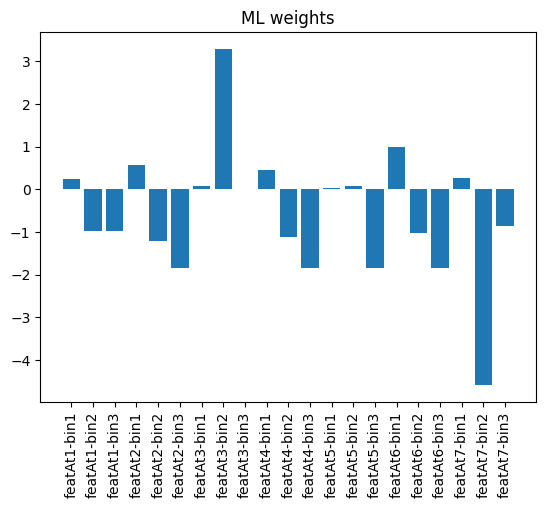


evaluate
encoding test set
X_disc shape:  (27, 21)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt2-bin1',
       'featAt2-bin2', 'featAt2-bin3', 'featAt3-bin1', 'featAt3-bin2',
       'featAt3-bin3', 'featAt4-bin1', 'featAt4-bin2', 'featAt4-bin3',
       'featAt5-bin1', 'featAt5-bin2', 'featAt5-bin3', 'featAt6-bin1',
       'featAt6-bin2', 'featAt6-bin3', 'featAt7-bin1', 'featAt7-bin2',
       'featAt7-bin3'],
      dtype='object')
X_disc head:       featAt1-bin1  featAt1-bin2  featAt1-bin3  featAt2-bin1  featAt2-bin2  \
100             1             1             0             1             1   
10              1             0             0             1             1   
4               1             1             0             1             1   
81              1             1             0             1             1   
97              1             1             0             1             1   

     featAt2-bin3  featAt3-bin1  featAt3-bin2  featAt

In [11]:
start_time = time.time()
scorecard = Scorecard()
app_caim_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [12]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 21



discretization thresholds

thresholds  {'At1': [0.0135, 0.0445, 0.0755, 0.0935, 0.1, 0.109, 0.118, 0.131, 0.16449999999999998, 0.189, 0.1955, 0.202, 0.2085, 0.2175, 0.22899999999999998, 0.2535, 0.27749999999999997, 0.291, 0.3, 0.311, 0.3355, 0.3555, 0.362, 0.3665, 0.3735, 0.3845, 0.3935, 0.398, 0.40449999999999997, 0.411, 0.4155, 0.42, 0.4245, 0.4335, 0.4445, 0.4535, 0.46, 0.4645, 0.469, 0.4755, 0.4845, 0.491, 0.4975, 0.5045, 0.5115000000000001, 0.52, 0.531, 0.547, 0.5645, 0.582, 0.602, 0.6174999999999999, 0.651, 0.7155, 0.7575000000000001, 0.78, 0.8400000000000001], 'At2': [0.0805, 0.16999999999999998, 0.1875, 0.21400000000000002, 0.241, 0.259, 0.3215, 0.393, 0.42, 0.4465, 0.473, 0.491, 0.509, 0.5445, 0.58, 0.598, 0.616, 0.634, 0.652, 0.67, 0.6965, 0.723, 0.741, 0.759, 0.777, 0.795, 0.8125, 0.83, 0.848, 0.866, 0.884, 0.902, 0.92, 0.9375, 0.955], 'At3': [0.011, 0.0335, 0.0475, 0.053500000000000006, 0.0665, 0.0905, 0.108, 0.1125, 0.1185, 0.1275, 0.14250000000000002, 0.1535, 0.1555, 0.1

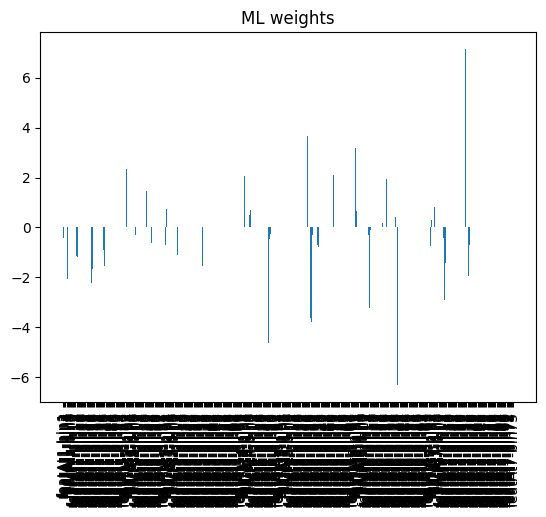

num of zero weights:  352
num of non-zero weights:  53
           Feature    Weight
0     featAt1-bin1 -0.427671
4     featAt1-bin5 -2.079682
12   featAt1-bin13 -1.163622
13   featAt1-bin14 -1.174641
25   featAt1-bin26 -2.240430
26   featAt1-bin27 -1.670076
36   featAt1-bin37 -0.900736
37   featAt1-bin38 -1.539014
57    featAt2-bin1  2.354639
60    featAt2-bin4  0.004206
65    featAt2-bin9 -0.323069
75   featAt2-bin19  1.441613
79   featAt2-bin23 -0.636994
92    featAt3-bin1 -0.694045
93    featAt3-bin2  0.724991
95    featAt3-bin4  0.737952
103  featAt3-bin12 -1.093692
125  featAt3-bin34 -1.565856
163   featAt4-bin3  2.055956
167   featAt4-bin7  0.485360
168   featAt4-bin8  0.702325
184  featAt4-bin24 -4.642893
185  featAt4-bin25 -0.450923
186  featAt4-bin26 -0.262664
200   featAt5-bin6 -0.009463
218  featAt5-bin24  1.146240
219  featAt5-bin25  3.657145
222  featAt5-bin28 -3.627644
223  featAt5-bin29 -3.777057
224  featAt5-bin30 -0.288316
228  featAt5-bin34 -0.717082
229  featAt5-bin3

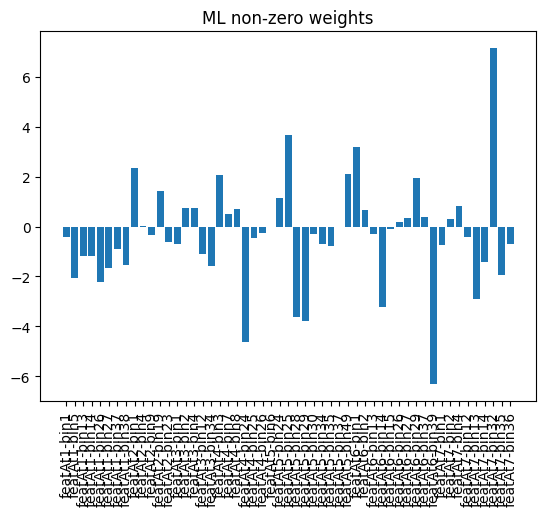


evaluate
encoding test set
X_disc shape:  (27, 405)
X_disc columns:  Index(['featAt1-bin1', 'featAt1-bin2', 'featAt1-bin3', 'featAt1-bin4',
       'featAt1-bin5', 'featAt1-bin6', 'featAt1-bin7', 'featAt1-bin8',
       'featAt1-bin9', 'featAt1-bin10',
       ...
       'featAt7-bin66', 'featAt7-bin67', 'featAt7-bin68', 'featAt7-bin69',
       'featAt7-bin70', 'featAt7-bin71', 'featAt7-bin72', 'featAt7-bin73',
       'featAt7-bin74', 'featAt7-bin75'],
      dtype='object', length=405)
X_disc head:       featAt1-bin1  featAt1-bin2  featAt1-bin3  featAt1-bin4  featAt1-bin5  \
100             1             1             1             1             1   
10              1             1             0             0             0   
4               1             1             1             1             1   
81              1             1             1             1             1   
97              1             1             1             1             1   

     featAt1-bin6  featAt1-bin7  f

In [13]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## mammographic masses
discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

https://archive.ics.uci.edu/dataset/161/mammographic+mass

In [14]:
# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 

print("num observations: ", mammo_y.count())

# drop rows with nulls
mammo_combined = pd.concat([mammo_X, mammo_y], axis=1)
print("num rows with nulls: ", mammo_combined.isnull().sum().sum())
mammo_combined = mammo_combined.dropna()
mammo_combined = mammo_combined.reset_index(drop=True)
mammo_X = mammo_combined.iloc[:, :-1]
mammo_y = mammo_combined.iloc[:, -1]


# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 

print("num observations: ", mammo_y.count())
print("target distribution: ", mammo_y.value_counts())

mammo_X.describe()

num observations:  Severity    961
dtype: int64
num rows with nulls:  162
num observations:  830
target distribution:  Severity
0    427
1    403
Name: count, dtype: int64


,BI-RADS,Age,Shape,Margin,Density
count,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663
std,1.888371,14.671782,1.242361,1.567175,0.350936
min,0.000000,18.000000,1.000000,1.000000,1.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000


In [15]:
categorical_columns = mammo_X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mammo_X[col] = mammo_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mammo_X[col].unique()}")

Categorical columns:  []



discretization thresholds
# 0  GLOBAL CAIM  212.74155287114846
# 1  GLOBAL CAIM  149.33510660361705
# 2  GLOBAL CAIM  185.1713335850323
# 3  GLOBAL CAIM  180.0868805405806
# 4  GLOBAL CAIM  83.30694344287627

thresholds  {'BI-RADS': [0.0, 4.0, 55.0], 'Age': [19.0, 57.0, 96.0], 'Shape': [1.0, 2.0, 4.0], 'Margin': [1.0, 2.0, 5.0], 'Density': [1.0, 2.0, 4.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding
X_disc shape:  (622, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:     featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
0                 0                 1                 0             1   
1                 0

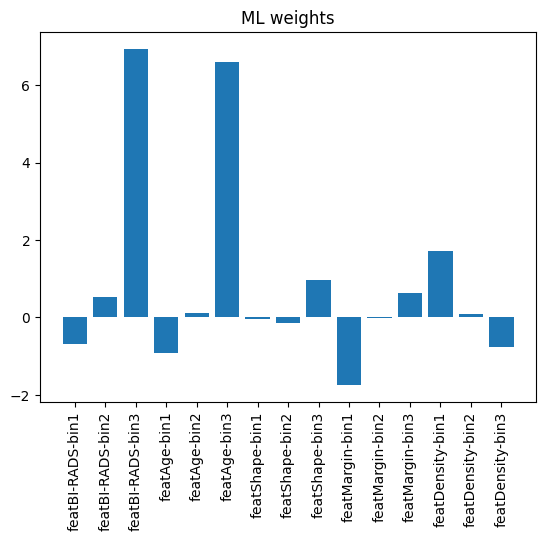


evaluate
encoding test set
X_disc shape:  (208, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:     featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
0                 0                 1                 0             0   
1                 0                 1                 0             1   
2                 0                 1                 0             1   
3                 0                 1                 0             1   
4                 0                 1                 0             1   

   featAge-bin2  featAge-bin3  featShape-bin1  featShape-bin2  featShape-bin3  \
0             1             0               1              

In [16]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [17]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 15



discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [20.0, 21.5, 22.5, 23.5, 24.5, 26.0, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 92.0], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 68
  Shape: 4
  Margin: 5
  Density: 4

encoding
X_disc shape:  (622, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin10', 'featAge-bin11', 'featAge-bin12',
       'featAge-bin13', 'featAge-bin14', 'featAge-bin15', 'featAge-bin16',
       'fe

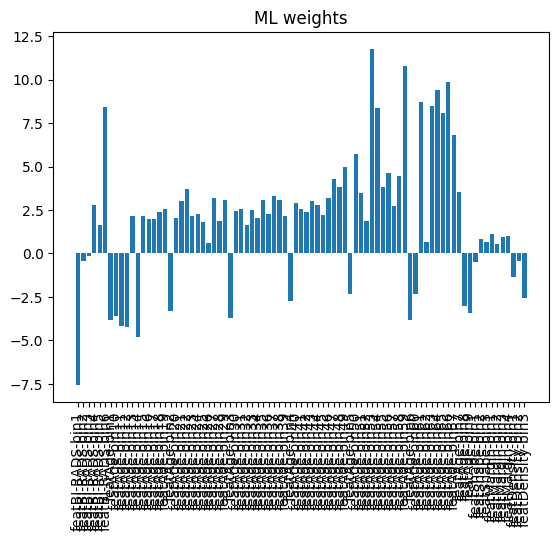


evaluate
encoding test set
X_disc shape:  (208, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin10', 'featAge-bin11', 'featAge-bin12',
       'featAge-bin13', 'featAge-bin14', 'featAge-bin15', 'featAge-bin16',
       'featAge-bin17', 'featAge-bin18', 'featAge-bin19', 'featAge-bin2',
       'featAge-bin20', 'featAge-bin21', 'featAge-bin22', 'featAge-bin23',
       'featAge-bin24', 'featAge-bin25', 'featAge-bin26', 'featAge-bin27',
       'featAge-bin28', 'featAge-bin29', 'featAge-bin3', 'featAge-bin30',
       'featAge-bin31', 'featAge-bin32', 'featAge-bin33', 'featAge-bin34',
       'featAge-bin35', 'featAge-bin36', 'featAge-bin37', 'featAge-bin38',
       'featAge-bin39', 'featAge-bin4', 'featAge-bin40', 'featAge-bin41',
       'featAge-bin42', 'featAge-bin43', 'featAge-bin44', 'featAge-bin45',
       'featAge-bin46', 'featAge-bin47', 'featAge-

In [18]:
start_time = time.time()
scorecard = Scorecard()
mammo_infbins_1ook_ml_model, mammo_infbins_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  212.74155287114846
# 1  GLOBAL CAIM  149.33510660361705
# 2  GLOBAL CAIM  185.1713335850323
# 3  GLOBAL CAIM  180.0868805405806
# 4  GLOBAL CAIM  83.30694344287627

thresholds  {'BI-RADS': [0.0, 4.0, 55.0], 'Age': [19.0, 57.0, 96.0], 'Shape': [1.0, 2.0, 4.0], 'Margin': [1.0, 2.0, 5.0], 'Density': [1.0, 2.0, 4.0]}
num of bins: 
  BI-RADS: 4
  Age: 4
  Shape: 4
  Margin: 4
  Density: 4

encoding
X_disc shape:  (622, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
90                  1                 1                 0             1   
777            

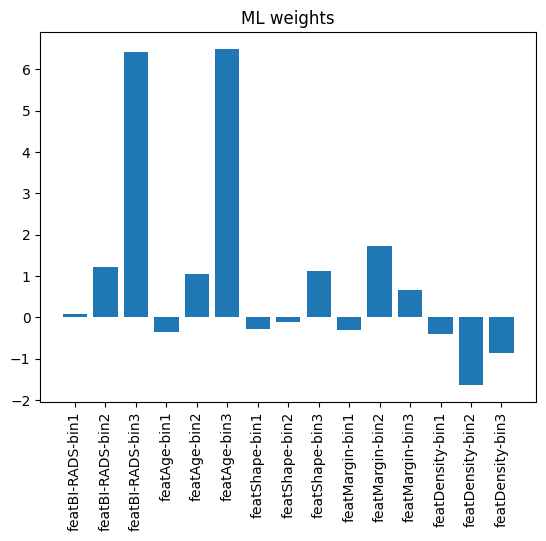


evaluate
encoding test set
X_disc shape:  (208, 15)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featShape-bin1',
       'featShape-bin2', 'featShape-bin3', 'featMargin-bin1',
       'featMargin-bin2', 'featMargin-bin3', 'featDensity-bin1',
       'featDensity-bin2', 'featDensity-bin3'],
      dtype='object')
X_disc head:       featBI-RADS-bin1  featBI-RADS-bin2  featBI-RADS-bin3  featAge-bin1  \
608                 1                 1                 0             1   
457                 1                 1                 0             1   
290                 1                 1                 0             1   
558                 1                 1                 0             1   
168                 1                 1                 0             1   

     featAge-bin2  featAge-bin3  featShape-bin1  featShape-bin2  \
608             1             0               1              

In [19]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_diff_ml_model, mammo_caim_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [20]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 15



discretization thresholds

thresholds  {'BI-RADS': [1.0, 2.5, 3.5, 4.5, 5.5, 30.5], 'Age': [20.0, 21.5, 22.5, 23.5, 24.5, 26.0, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 82.0, 83.5, 84.5, 85.5, 86.5, 87.5, 92.0], 'Shape': [1.5, 2.5, 3.5], 'Margin': [1.5, 2.5, 3.5, 4.5], 'Density': [1.5, 2.5, 3.5]}
num of bins: 
  BI-RADS: 7
  Age: 68
  Shape: 4
  Margin: 5
  Density: 4

encoding
X_disc shape:  (622, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-b

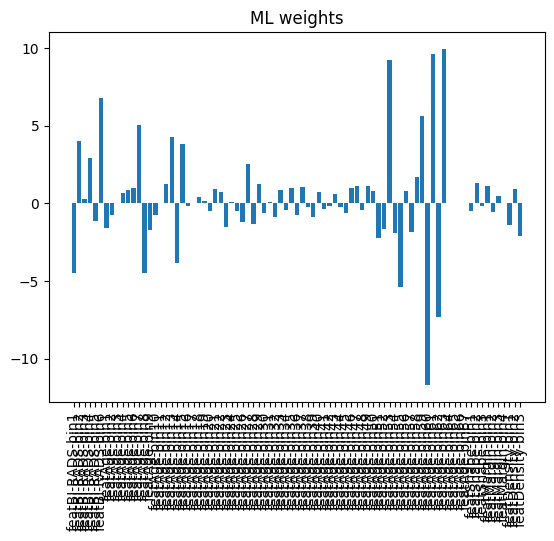

num of zero weights:  5
num of non-zero weights:  78
             Feature    Weight
0   featBI-RADS-bin1 -4.460583
1   featBI-RADS-bin2  4.052564
2   featBI-RADS-bin3  0.278789
3   featBI-RADS-bin4  2.902052
4   featBI-RADS-bin5 -1.145159
..               ...       ...
78   featMargin-bin3  0.451816
79   featMargin-bin4  0.017844
80  featDensity-bin1 -1.386229
81  featDensity-bin2  0.951080
82  featDensity-bin3 -2.130293

[78 rows x 2 columns]


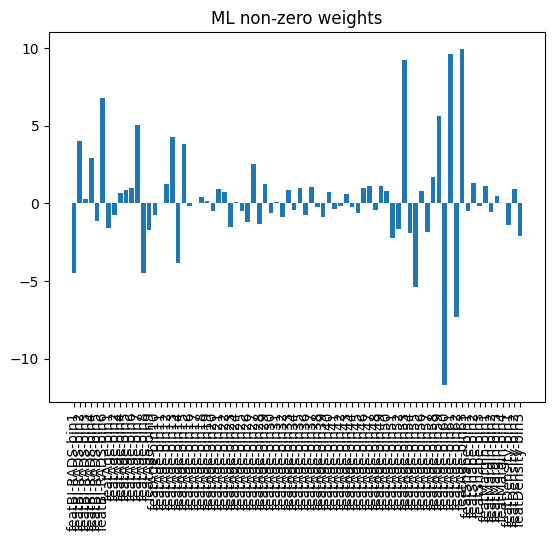


evaluate
encoding test set
X_disc shape:  (208, 83)
X_disc columns:  Index(['featBI-RADS-bin1', 'featBI-RADS-bin2', 'featBI-RADS-bin3',
       'featBI-RADS-bin4', 'featBI-RADS-bin5', 'featBI-RADS-bin6',
       'featAge-bin1', 'featAge-bin2', 'featAge-bin3', 'featAge-bin4',
       'featAge-bin5', 'featAge-bin6', 'featAge-bin7', 'featAge-bin8',
       'featAge-bin9', 'featAge-bin10', 'featAge-bin11', 'featAge-bin12',
       'featAge-bin13', 'featAge-bin14', 'featAge-bin15', 'featAge-bin16',
       'featAge-bin17', 'featAge-bin18', 'featAge-bin19', 'featAge-bin20',
       'featAge-bin21', 'featAge-bin22', 'featAge-bin23', 'featAge-bin24',
       'featAge-bin25', 'featAge-bin26', 'featAge-bin27', 'featAge-bin28',
       'featAge-bin29', 'featAge-bin30', 'featAge-bin31', 'featAge-bin32',
       'featAge-bin33', 'featAge-bin34', 'featAge-bin35', 'featAge-bin36',
       'featAge-bin37', 'featAge-bin38', 'featAge-bin39', 'featAge-bin40',
       'featAge-bin41', 'featAge-bin42', 'featAge-bin43

In [21]:
start_time = time.time()
scorecard = Scorecard()
mammo_infbins_diff_ml_model, mammo_infbins_diff_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## aesthetic evaluation (binary version)

In [22]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

,Subjective Evaluation,BRA Value,LBC Value,UNR Value,BCE Value,BCD Value,BAD Value,BOD Value,pBRA Value,pLBC Value,...,pBAD Value,pBOD Value,cX2L Value,cX2a Value,cX2b Value,cX2Lab Value,cEMDL Value,cEMDa Value,cEMDb Value,cEMDLab Value
0,Good,1.149009,0.830915,0.107618,0.938534,1.934477,4.885198,17.296370,0.049401,0.033356,...,0.029188,0.103340,0.097502,0.009506,0.217169,0.100670,1.503086,0.030362,0.291363,0.210082
1,Good,2.368824,1.326447,1.599444,0.272997,0.035378,19.932998,68.761479,0.113919,0.058509,...,0.117875,0.406627,0.305692,0.159653,0.193317,0.061736,1.248600,0.206529,0.351693,0.105346
2,Good,1.409939,0.950935,0.278358,1.229293,2.221074,22.277770,38.323430,0.067231,0.038613,...,0.120132,0.206658,0.109386,0.024217,0.280625,0.012974,0.545858,0.075520,0.304185,0.049345
3,Good,2.059918,0.720926,1.786307,1.065381,1.995007,25.163410,31.631070,0.100705,0.032141,...,0.156030,0.196133,0.038581,0.032267,0.026153,0.010779,0.334111,0.105626,0.137693,0.031455
4,Good,2.452595,0.798596,1.868745,1.070148,1.218189,0.395585,31.426783,0.117249,0.035235,...,0.002820,0.224062,0.021259,0.027071,0.029206,0.006495,0.165401,0.081549,0.091768,0.030546


In [23]:
aesthetic_evaluation_y.value_counts()

Subjective Evaluation
Good         595
Fair         353
Excellent    308
Poor         102
Name: count, dtype: int64

In [24]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
aesthetic_evaluation_binary_y.value_counts()

Subjective Evaluation
1    903
0    455
Name: count, dtype: int64

In [25]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")


Categorical columns: []



discretization thresholds
# 0  GLOBAL CAIM  284.4667251085614
# 1  GLOBAL CAIM  319.91312389427975
# 2  GLOBAL CAIM  310.65528391462
# 3  GLOBAL CAIM  264.61503487792726
# 4  GLOBAL CAIM  301.30958385876414
# 5  GLOBAL CAIM  279.9853184348108
# 6  GLOBAL CAIM  254.92857142857142
# 7  GLOBAL CAIM  283.8091946384869
# 8  GLOBAL CAIM  326.32841044544915
# 9  GLOBAL CAIM  311.23279220779216
# 10  GLOBAL CAIM  260.30719397363464
# 11  GLOBAL CAIM  302.9968801506946
# 12  GLOBAL CAIM  286.1581350024665
# 13  GLOBAL CAIM  270.60998778381565
# 14  GLOBAL CAIM  231.88167714638303
# 15  GLOBAL CAIM  231.14287375930525
# 16  GLOBAL CAIM  237.17261685532122
# 17  GLOBAL CAIM  240.77703891257994
# 18  GLOBAL CAIM  242.93937002585716
# 19  GLOBAL CAIM  228.9271194683093
# 20  GLOBAL CAIM  229.37854806900165
# 21  GLOBAL CAIM  243.28865422173774

thresholds  {'BRA Value': [0.1623383287101974, 4.028486686743844, 24.075530326533293], 'LBC Value': [0.0004087089954772, 2.079932905328359, 8.8154176988061

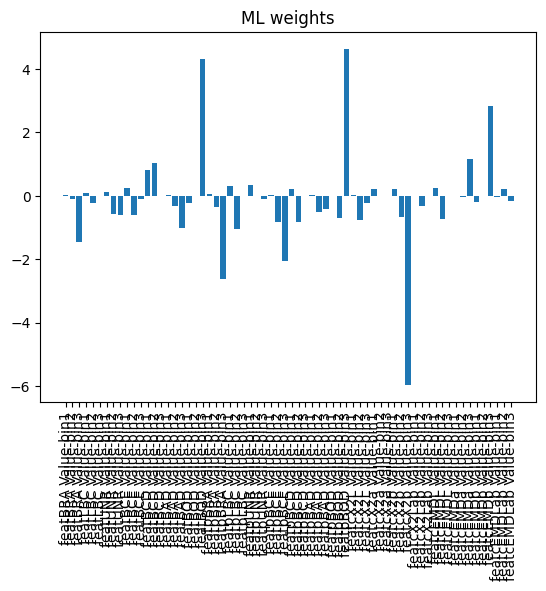

num of zero weights:  11
num of non-zero weights:  55
                   Feature    Weight
0       featBRA Value-bin1  0.034286
1       featBRA Value-bin2 -0.110343
2       featBRA Value-bin3 -1.462043
3       featLBC Value-bin1  0.073186
4       featLBC Value-bin2 -0.215317
6       featUNR Value-bin1  0.133091
7       featUNR Value-bin2 -0.570625
8       featUNR Value-bin3 -0.612716
9       featBCE Value-bin1  0.237410
10      featBCE Value-bin2 -0.622413
11      featBCE Value-bin3 -0.105168
12      featBCD Value-bin1  0.809341
13      featBCD Value-bin2  1.025556
15      featBAD Value-bin1  0.023162
16      featBAD Value-bin2 -0.311443
17      featBAD Value-bin3 -1.005023
18      featBOD Value-bin1 -0.216390
20      featBOD Value-bin3  4.310679
21     featpBRA Value-bin1  0.059664
22     featpBRA Value-bin2 -0.347679
23     featpBRA Value-bin3 -2.633171
24     featpLBC Value-bin1  0.298069
25     featpLBC Value-bin2 -1.039219
27     featpUNR Value-bin1  0.347711
29     featpUNR Value

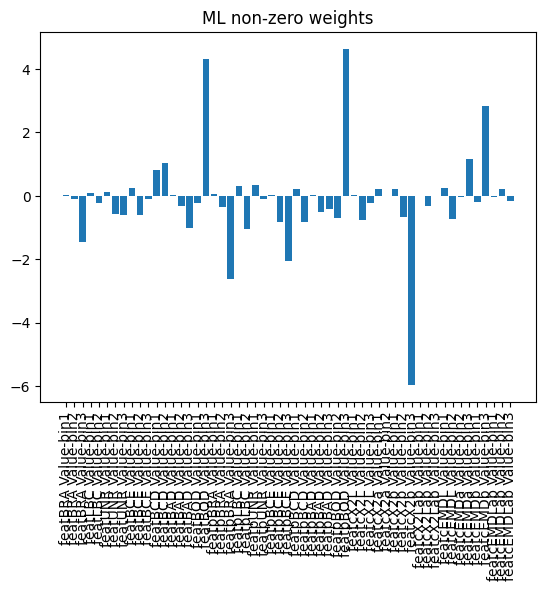


evaluate
encoding test set
X_disc shape:  (340, 66)
X_disc columns:  Index(['featBRA Value-bin1', 'featBRA Value-bin2', 'featBRA Value-bin3',
       'featLBC Value-bin1', 'featLBC Value-bin2', 'featLBC Value-bin3',
       'featUNR Value-bin1', 'featUNR Value-bin2', 'featUNR Value-bin3',
       'featBCE Value-bin1', 'featBCE Value-bin2', 'featBCE Value-bin3',
       'featBCD Value-bin1', 'featBCD Value-bin2', 'featBCD Value-bin3',
       'featBAD Value-bin1', 'featBAD Value-bin2', 'featBAD Value-bin3',
       'featBOD Value-bin1', 'featBOD Value-bin2', 'featBOD Value-bin3',
       'featpBRA Value-bin1', 'featpBRA Value-bin2', 'featpBRA Value-bin3',
       'featpLBC Value-bin1', 'featpLBC Value-bin2', 'featpLBC Value-bin3',
       'featpUNR Value-bin1', 'featpUNR Value-bin2', 'featpUNR Value-bin3',
       'featpBCE Value-bin1', 'featpBCE Value-bin2', 'featpBCE Value-bin3',
       'featpBCD Value-bin1', 'featpBCD Value-bin2', 'featpBCD Value-bin3',
       'featpBAD Value-bin1', 'featpBAD

In [26]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [27]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 55



discretization thresholds

thresholds  {'BRA Value': [0.17135143897882216, 0.189619931322902, 0.20154489666341896, 0.20882918670067196, 0.21511673901980122, 0.23356299924095925, 0.25998993666774833, 0.26979525183184316, 0.2772706540547385, 0.284913290130897, 0.29489299511289246, 0.3077080529466657, 0.3136842659973549, 0.3244746116292725, 0.33359830460351236, 0.33569655002749277, 0.3385120196442457, 0.3446575366240152, 0.35401413619332134, 0.36326914384912906, 0.3778090863252669, 0.3949056631257663, 0.4016605202196266, 0.40327292614681354, 0.4057383237190699, 0.4156656346454741, 0.43301866189125515, 0.44161193606901394, 0.4444553868713025, 0.44826727689531626, 0.4507029785364637, 0.4527075558787709, 0.46627042196334445, 0.48283427376436205, 0.491955979289541, 0.49752310090265306, 0.5011587409307503, 0.5074452603027287, 0.5135681371939604, 0.520378007902174, 0.5243768810667505, 0.5252328762213174, 0.5266390394944898, 0.5276260605099737, 0.5302659953487654, 0.5343533067520025, 0.53688177

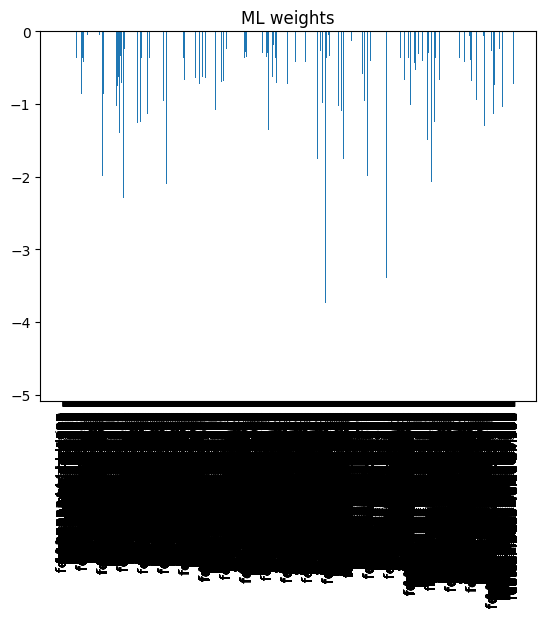

num of zero weights:  15957
num of non-zero weights:  6417
                        Feature    Weight
3         featBRA Value-bin1000 -1.020762
4         featBRA Value-bin1001 -1.075675
5         featBRA Value-bin1002 -0.635030
6         featBRA Value-bin1003 -0.365637
7         featBRA Value-bin1004 -0.701718
...                         ...       ...
22362  featcEMDLab Value-bin989 -1.019308
22365  featcEMDLab Value-bin991 -0.729421
22367  featcEMDLab Value-bin993 -0.372471
22370  featcEMDLab Value-bin996 -0.467075
22373  featcEMDLab Value-bin999 -0.701867

[6417 rows x 2 columns]


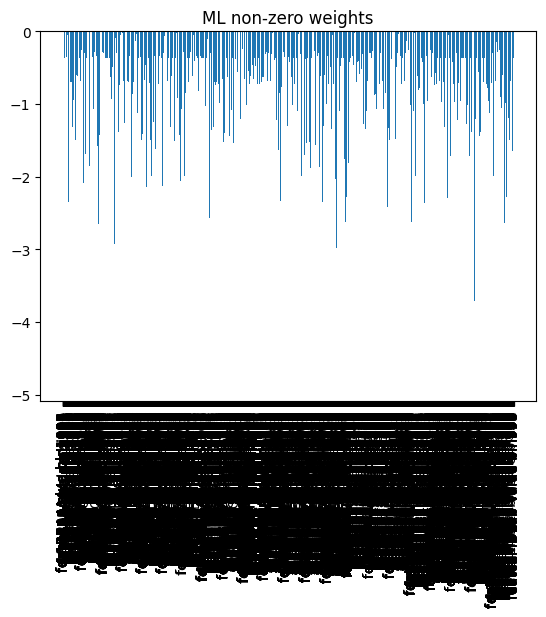


evaluate
encoding test set
X_disc shape:  (340, 22374)
X_disc columns:  Index(['featBRA Value-bin1', 'featBRA Value-bin10', 'featBRA Value-bin100',
       'featBRA Value-bin1000', 'featBRA Value-bin1001',
       'featBRA Value-bin1002', 'featBRA Value-bin1003',
       'featBRA Value-bin1004', 'featBRA Value-bin1005',
       'featBRA Value-bin1006',
       ...
       'featcEMDLab Value-bin990', 'featcEMDLab Value-bin991',
       'featcEMDLab Value-bin992', 'featcEMDLab Value-bin993',
       'featcEMDLab Value-bin994', 'featcEMDLab Value-bin995',
       'featcEMDLab Value-bin996', 'featcEMDLab Value-bin997',
       'featcEMDLab Value-bin998', 'featcEMDLab Value-bin999'],
      dtype='object', length=22374)
X_disc head:     featBRA Value-bin1  featBRA Value-bin10  featBRA Value-bin100  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   

In [28]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  284.4667251085614
# 1  GLOBAL CAIM  319.91312389427975
# 2  GLOBAL CAIM  310.65528391462
# 3  GLOBAL CAIM  264.61503487792726
# 4  GLOBAL CAIM  301.30958385876414
# 5  GLOBAL CAIM  279.9853184348108
# 6  GLOBAL CAIM  254.92857142857142
# 7  GLOBAL CAIM  283.8091946384869
# 8  GLOBAL CAIM  326.32841044544915
# 9  GLOBAL CAIM  311.23279220779216
# 10  GLOBAL CAIM  260.30719397363464
# 11  GLOBAL CAIM  302.9968801506946
# 12  GLOBAL CAIM  286.1581350024665
# 13  GLOBAL CAIM  270.60998778381565
# 14  GLOBAL CAIM  231.88167714638303
# 15  GLOBAL CAIM  231.14287375930525
# 16  GLOBAL CAIM  237.17261685532122
# 17  GLOBAL CAIM  240.77703891257994
# 18  GLOBAL CAIM  242.93937002585716
# 19  GLOBAL CAIM  228.9271194683093
# 20  GLOBAL CAIM  229.37854806900165
# 21  GLOBAL CAIM  243.28865422173774

thresholds  {'BRA Value': [0.1623383287101974, 4.028486686743844, 24.075530326533293], 'LBC Value': [0.0004087089954772, 2.079932905328359, 8.8154176988061

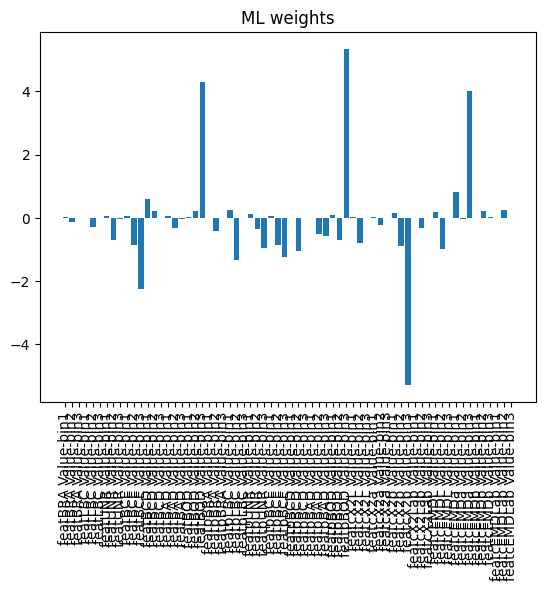

num of zero weights:  10
num of non-zero weights:  56
                   Feature    Weight
0       featBRA Value-bin1  0.021508
1       featBRA Value-bin2 -0.144262
2       featBRA Value-bin3 -0.017435
3       featLBC Value-bin1  0.005974
4       featLBC Value-bin2 -0.287944
6       featUNR Value-bin1  0.061980
7       featUNR Value-bin2 -0.700770
8       featUNR Value-bin3 -0.031572
9       featBCE Value-bin1  0.056376
10      featBCE Value-bin2 -0.859866
11      featBCE Value-bin3 -2.243937
12      featBCD Value-bin1  0.596886
13      featBCD Value-bin2  0.214368
15      featBAD Value-bin1  0.051748
16      featBAD Value-bin2 -0.333719
17      featBAD Value-bin3 -0.035801
18      featBOD Value-bin1  0.030031
19      featBOD Value-bin2  0.215690
20      featBOD Value-bin3  4.310039
21     featpBRA Value-bin1  0.000803
22     featpBRA Value-bin2 -0.407481
23     featpBRA Value-bin3 -0.009824
24     featpLBC Value-bin1  0.246927
25     featpLBC Value-bin2 -1.337279
27     featpUNR Value

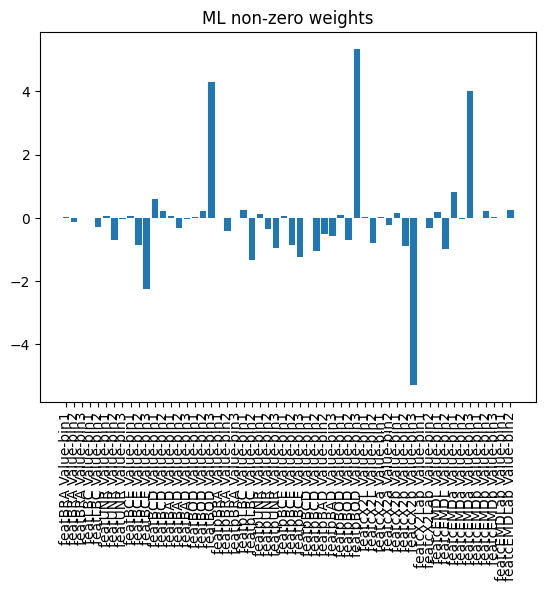


evaluate
encoding test set
X_disc shape:  (340, 66)
X_disc columns:  Index(['featBRA Value-bin1', 'featBRA Value-bin2', 'featBRA Value-bin3',
       'featLBC Value-bin1', 'featLBC Value-bin2', 'featLBC Value-bin3',
       'featUNR Value-bin1', 'featUNR Value-bin2', 'featUNR Value-bin3',
       'featBCE Value-bin1', 'featBCE Value-bin2', 'featBCE Value-bin3',
       'featBCD Value-bin1', 'featBCD Value-bin2', 'featBCD Value-bin3',
       'featBAD Value-bin1', 'featBAD Value-bin2', 'featBAD Value-bin3',
       'featBOD Value-bin1', 'featBOD Value-bin2', 'featBOD Value-bin3',
       'featpBRA Value-bin1', 'featpBRA Value-bin2', 'featpBRA Value-bin3',
       'featpLBC Value-bin1', 'featpLBC Value-bin2', 'featpLBC Value-bin3',
       'featpUNR Value-bin1', 'featpUNR Value-bin2', 'featpUNR Value-bin3',
       'featpBCE Value-bin1', 'featpBCE Value-bin2', 'featpBCE Value-bin3',
       'featpBCD Value-bin1', 'featpBCD Value-bin2', 'featpBCD Value-bin3',
       'featpBAD Value-bin1', 'featpBAD

In [29]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [30]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 56



discretization thresholds

thresholds  {'BRA Value': [0.17135143897882216, 0.189619931322902, 0.20154489666341896, 0.20882918670067196, 0.21511673901980122, 0.23356299924095925, 0.25998993666774833, 0.26979525183184316, 0.2772706540547385, 0.284913290130897, 0.29489299511289246, 0.3077080529466657, 0.3136842659973549, 0.3244746116292725, 0.33359830460351236, 0.33569655002749277, 0.3385120196442457, 0.3446575366240152, 0.35401413619332134, 0.36326914384912906, 0.3778090863252669, 0.3949056631257663, 0.4016605202196266, 0.40327292614681354, 0.4057383237190699, 0.4156656346454741, 0.43301866189125515, 0.44161193606901394, 0.4444553868713025, 0.44826727689531626, 0.4507029785364637, 0.4527075558787709, 0.46627042196334445, 0.48283427376436205, 0.491955979289541, 0.49752310090265306, 0.5011587409307503, 0.5074452603027287, 0.5135681371939604, 0.520378007902174, 0.5243768810667505, 0.5252328762213174, 0.5266390394944898, 0.5276260605099737, 0.5302659953487654, 0.5343533067520025, 0.53688177

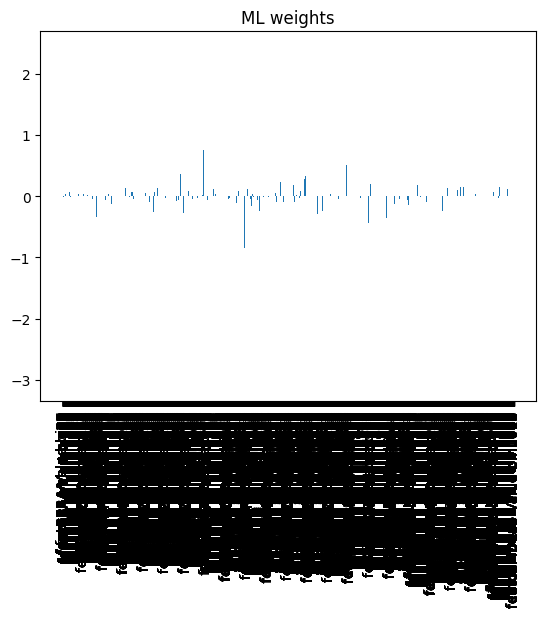

num of zero weights:  15358
num of non-zero weights:  7016
                        Feature    Weight
3            featBRA Value-bin4  0.021770
6            featBRA Value-bin7  0.023134
7            featBRA Value-bin8  0.018211
8            featBRA Value-bin9  0.022690
9           featBRA Value-bin10  0.045588
...                         ...       ...
22311  featcEMDLab Value-bin955  0.377832
22312  featcEMDLab Value-bin956  0.256618
22313  featcEMDLab Value-bin957  0.264164
22317  featcEMDLab Value-bin961  0.050152
22337  featcEMDLab Value-bin981  0.596218

[7016 rows x 2 columns]


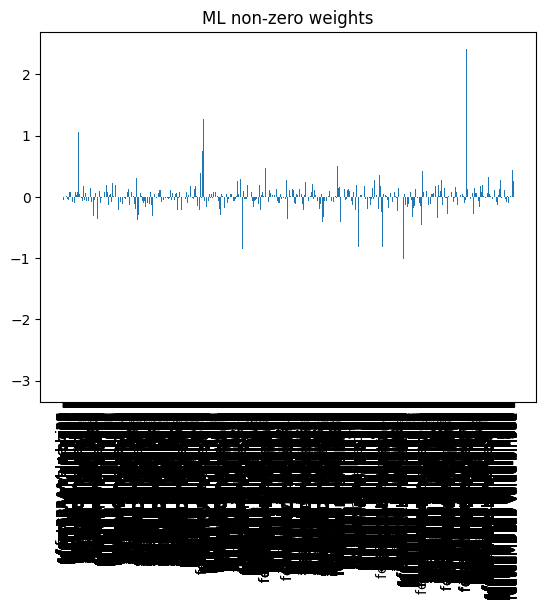


evaluate
encoding test set
X_disc shape:  (340, 22374)
X_disc columns:  Index(['featBRA Value-bin1', 'featBRA Value-bin2', 'featBRA Value-bin3',
       'featBRA Value-bin4', 'featBRA Value-bin5', 'featBRA Value-bin6',
       'featBRA Value-bin7', 'featBRA Value-bin8', 'featBRA Value-bin9',
       'featBRA Value-bin10',
       ...
       'featcEMDLab Value-bin1008', 'featcEMDLab Value-bin1009',
       'featcEMDLab Value-bin1010', 'featcEMDLab Value-bin1011',
       'featcEMDLab Value-bin1012', 'featcEMDLab Value-bin1013',
       'featcEMDLab Value-bin1014', 'featcEMDLab Value-bin1015',
       'featcEMDLab Value-bin1016', 'featcEMDLab Value-bin1017'],
      dtype='object', length=22374)
X_disc head:        featBRA Value-bin1  featBRA Value-bin2  featBRA Value-bin3  \
51                     1                   1                   1   
1099                   1                   1                   1   
1311                   1                   1                   1   
514                

In [31]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## adult
predict whether annual income of an individual exceeds $50K/yr based on census data

https://archive.ics.uci.edu/dataset/2/adult

num rows with nulls:  22746
num observations:  30162
num features:  14
target distribution:  income
0    22654
1     7508
Name: count, dtype: int64


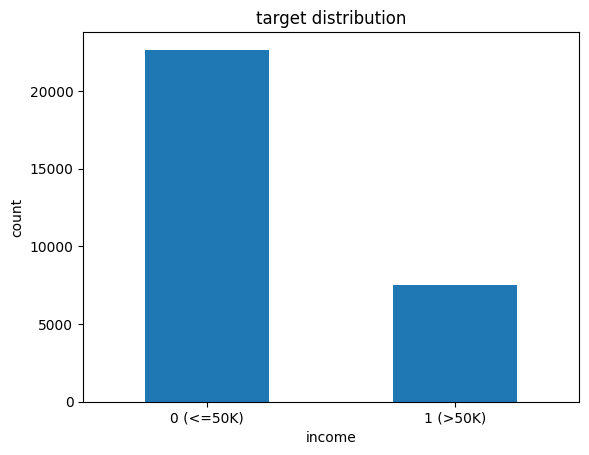

In [32]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# check for nulls

# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y.loc[:,'income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})


# substitute '?' with NaN
adult_X = adult_X.replace('?', pd.NA)
adult_y = adult_y.replace('?', pd.NA)

# drop rows with nulls
adult_combined = pd.concat([adult_X, adult_y], axis=1)
print("num rows with nulls: ", adult_combined.isnull().sum().sum())
adult_combined = adult_combined.dropna()
adult_combined = adult_combined.reset_index(drop=True)
adult_X = adult_combined.iloc[:, :-1]
adult_y = adult_combined.iloc[:, -1]

# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

# make y be int
adult_y = adult_y.astype(int)

print("num observations: ", adult_y.count())
print("num features: ", adult_X.shape[1])
print("target distribution: ", adult_y.value_counts())
adult_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (<=50K)', '1 (>50K)'], rotation=0)
plt.show()


In [33]:
# get type of each column
print("types: ", adult_X.dtypes)

# show categorical columns
print("\nobject columns: ", adult_X.select_dtypes(include=['object']).columns)
categorical_columns = adult_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", adult_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", adult_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

types:  age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

object columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

number of unique values in each categorical column:  workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

values of all categorical columns:  workclass         [State-gov, Self-emp-not-inc, Private, Federal...
education         [Bachelors, HS-grad, 11th, Masters, 9th, Some-...
marital-status    [Never-married, Married-civ-spouse, Divo

In [34]:
# show occupation column
print("\noccupation column: ", adult_X['occupation'].unique())


occupation column:  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [35]:
categorical_columns = adult_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    adult_X[col] = adult_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {adult_X[col].unique()}")

categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Column workclass encoded as: [5 4 2 0 1 3 6]
Column education encoded as: [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Column marital-status encoded as: [4 2 0 3 5 1 6]
Column occupation encoded as: [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Column relationship encoded as: [1 0 5 3 4 2]
Column race encoded as: [4 2 1 0 3]
Column sex encoded as: [1 0]
Column native-country encoded as: [38  4 22 18 25 32 15  8  1 10 19 29 30  3  0 36  6 24 35 13 31  5  7  9
 12 21  2 34 23 40 28 27 33 37 11 26 39 16 20 17 14]



discretization thresholds
# 0  GLOBAL CAIM  6559.253885585048
# 2  GLOBAL CAIM  6383.037253509981
# 4  GLOBAL CAIM  6771.507791170422
# 10  GLOBAL CAIM  7187.410120067854
# 11  GLOBAL CAIM  6603.209044590975
# 12  GLOBAL CAIM  6501.792701711587

thresholds  {'age': [17.0, 31.0, 90.0], 'fnlwgt': [14878.0, 209280.0, 1484705.0], 'education-num': [1.0, 13.0, 16.0], 'capital-gain': [0.0, 5060.0, 99999.0], 'capital-loss': [0.0, 1816.0, 4356.0], 'hours-per-week': [1.0, 41.0, 99.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'education': ['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9'], 'marital-status': ['0', '1', '2', '3', '4', '5', '6'], 'occupation': ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9'], 'relationship': ['0', '1', '2', '3', '4', '5'], 'race': ['0', '1', '2', '3', '4'], 'sex': ['0', '1'], 'native-country': ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24

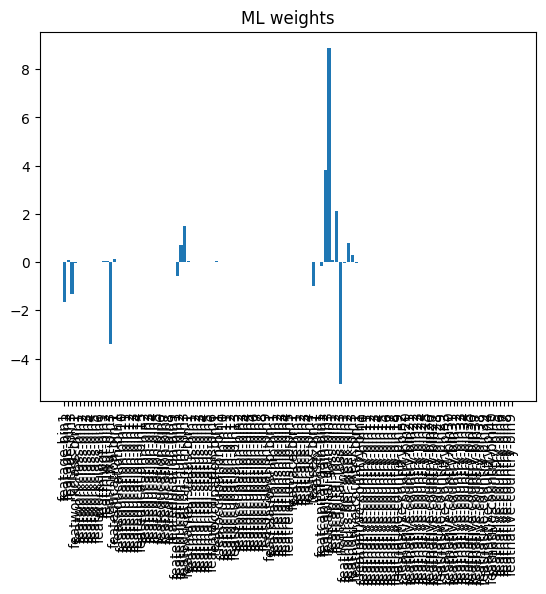

num of zero weights:  90
num of non-zero weights:  26
                     Feature    Weight
0               featage-bin1 -1.672749
1               featage-bin2  0.086479
2               featage-bin3 -1.305622
3        featworkclass-bin-1 -0.039344
10           featfnlwgt-bin1  0.030029
11           featfnlwgt-bin2  0.046479
12           featfnlwgt-bin3 -3.394530
13       feateducation-bin-1  0.137711
29    feateducation-num-bin1 -0.583506
30    feateducation-num-bin2  0.693143
31    feateducation-num-bin3  1.487804
32  featmarital-status-bin-1  0.029065
39      featoccupation-bin-1  0.055796
53    featrelationship-bin-1  0.000074
59            featrace-bin-1 -0.015044
64             featsex-bin-1 -1.005659
66     featcapital-gain-bin1 -0.157216
67     featcapital-gain-bin2  3.803004
68     featcapital-gain-bin3  8.863118
69     featcapital-loss-bin1  0.080887
70     featcapital-loss-bin2  2.138788
71     featcapital-loss-bin3 -5.076597
72   feathours-per-week-bin1 -0.028489
73   feath

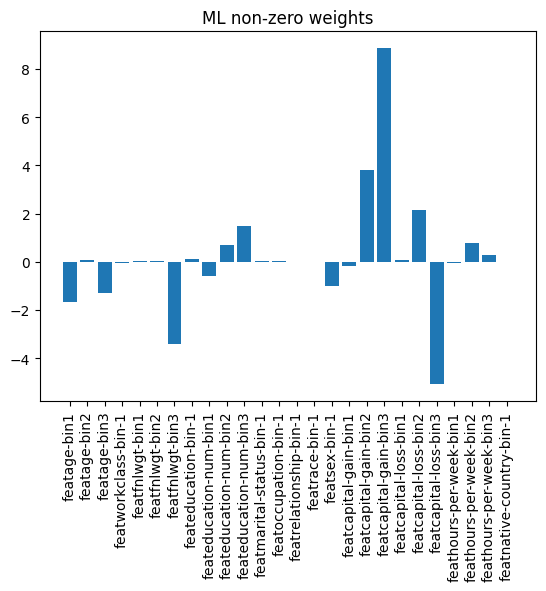


evaluate
encoding test set
X_disc shape:  (7541, 116)
X_disc columns:  Index(['featage-bin1', 'featage-bin2', 'featage-bin3', 'featworkclass-bin-1',
       'featworkclass-bin1', 'featworkclass-bin2', 'featworkclass-bin3',
       'featworkclass-bin4', 'featworkclass-bin5', 'featworkclass-bin6',
       ...
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin4',
       'featnative-country-bin40', 'featnative-country-bin5',
       'featnative-country-bin6', 'featnative-country-bin7',
       'featnative-country-bin8', 'featnative-country-bin9'],
      dtype='object', length=116)
X_disc head:     featage-bin1  featage-bin2  featage-bin3  featworkclass-bin-1  \
0             1             0             0                    1   
1             0             1             0                    1   
2             0             1             0                    1   
3             0             1             0                    

In [36]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [37]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 26



discretization thresholds

thresholds  {'age': [17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 87.0, 89.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'fnlwgt': [16852.5, 19020.5, 19258.0, 19348.5, 19402.5, 19450.5, 19505.5, 19610.0, 19726.0, 19799.5, 19873.0, 19906.5, 19985.5, 20083.0, 20144.0, 20243.5, 20315.5, 20328.0, 20385.5, 20453.5, 20490.0, 20522.5, 20605.0, 20702.0, 20761.5, 20802.0, 20881.0, 20954.5, 21028.5, 21127.5, 21164.0, 21240.0, 21389.0, 21585.0, 21745.0, 21834.0, 21891.0, 21974.0, 22114.0, 22193.5, 22206.0, 22228.0, 22279.0, 22365.5, 22420.0, 22425.0, 22445.5, 22478.5, 22520.0, 22593.5, 22692.0, 2278

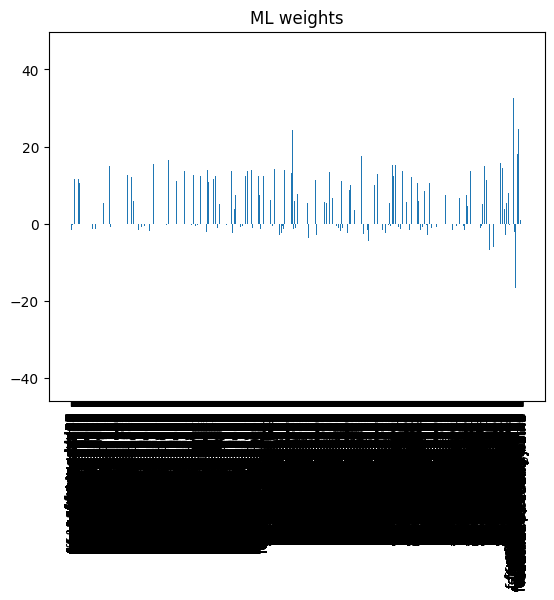

num of zero weights:  9761
num of non-zero weights:  7121
                        Feature     Weight
0                  featage-bin1 -13.321655
1                 featage-bin10  -2.874512
2                 featage-bin11  -2.566857
3                 featage-bin12  -2.205435
4                 featage-bin13  -1.578757
...                         ...        ...
16837   feathours-per-week-bin9 -10.508314
16838  feathours-per-week-bin90 -11.547798
16839  feathours-per-week-bin91  -6.561591
16840  feathours-per-week-bin92  -2.601567
16841  featnative-country-bin-1  -0.443489

[7121 rows x 2 columns]


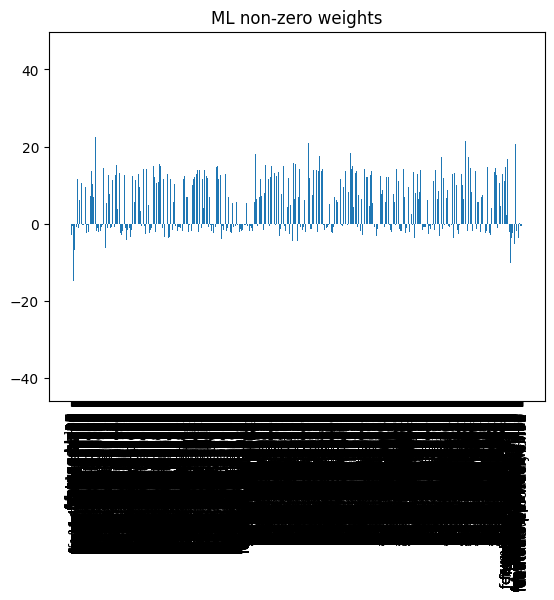


evaluate
encoding test set
X_disc shape:  (7541, 16882)
X_disc columns:  Index(['featage-bin1', 'featage-bin10', 'featage-bin11', 'featage-bin12',
       'featage-bin13', 'featage-bin14', 'featage-bin15', 'featage-bin16',
       'featage-bin17', 'featage-bin18',
       ...
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin4',
       'featnative-country-bin40', 'featnative-country-bin5',
       'featnative-country-bin6', 'featnative-country-bin7',
       'featnative-country-bin8', 'featnative-country-bin9'],
      dtype='object', length=16882)
X_disc head:     featage-bin1  featage-bin10  featage-bin11  featage-bin12  featage-bin13  \
0             0              0              1              0              0   
1             0              0              0              0              0   
2             0              0              0              0              0   
3             0              0              0    

In [38]:
start_time = time.time()

scorecard = Scorecard()
adult_infbins_1ook_ml_model, adult_infbins_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds
# 0  GLOBAL CAIM  6559.253885585048
# 2  GLOBAL CAIM  6383.037253509981
# 4  GLOBAL CAIM  6771.507791170422
# 10  GLOBAL CAIM  7187.410120067854
# 11  GLOBAL CAIM  6603.209044590975
# 12  GLOBAL CAIM  6501.792701711587

thresholds  {'age': [17.0, 31.0, 90.0], 'fnlwgt': [14878.0, 209280.0, 1484705.0], 'education-num': [1.0, 13.0, 16.0], 'capital-gain': [0.0, 5060.0, 99999.0], 'capital-loss': [0.0, 1816.0, 4356.0], 'hours-per-week': [1.0, 41.0, 99.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'education': ['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9'], 'marital-status': ['0', '1', '2', '3', '4', '5', '6'], 'occupation': ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9'], 'relationship': ['0', '1', '2', '3', '4', '5'], 'race': ['0', '1', '2', '3', '4'], 'sex': ['0', '1'], 'native-country': ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24

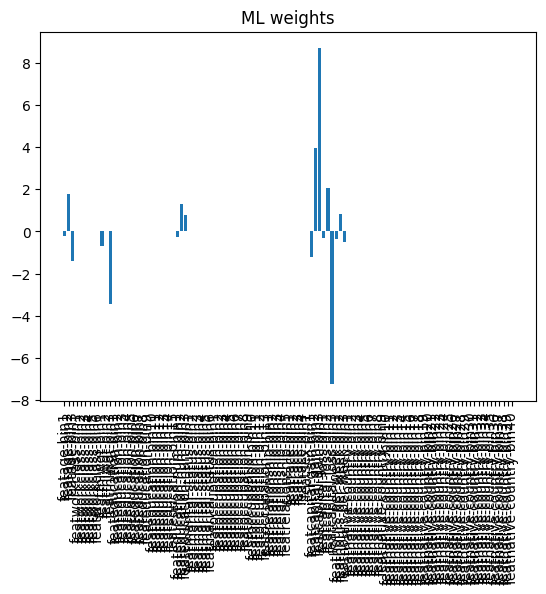

num of zero weights:  90
num of non-zero weights:  18
                    Feature    Weight
0              featage-bin1 -0.206061
1              featage-bin2  1.756922
2              featage-bin3 -1.391814
9           featfnlwgt-bin1 -0.679034
10          featfnlwgt-bin2  0.016348
11          featfnlwgt-bin3 -3.455435
27   feateducation-num-bin1 -0.242965
28   feateducation-num-bin2  1.276628
29   feateducation-num-bin3  0.794413
59    featcapital-gain-bin1 -1.201227
60    featcapital-gain-bin2  3.959890
61    featcapital-gain-bin3  8.671198
62    featcapital-loss-bin1 -0.302084
63    featcapital-loss-bin2  2.057881
64    featcapital-loss-bin3 -7.253520
65  feathours-per-week-bin1 -0.341220
66  feathours-per-week-bin2  0.808973
67  feathours-per-week-bin3 -0.492423


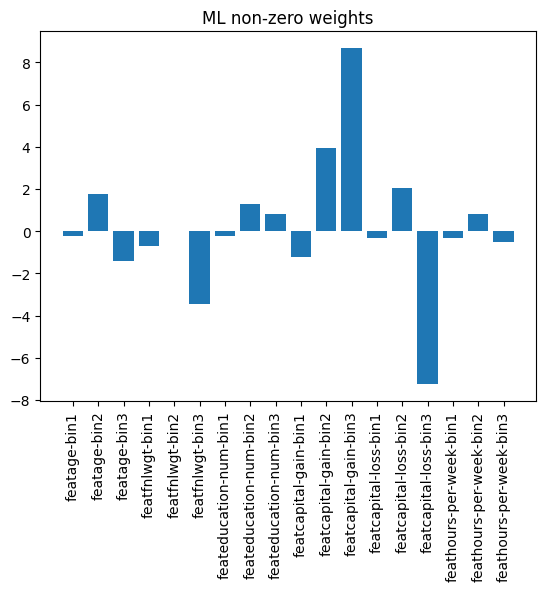


evaluate
encoding test set
X_disc shape:  (7541, 108)
X_disc columns:  Index(['featage-bin1', 'featage-bin2', 'featage-bin3', 'featworkclass-bin1',
       'featworkclass-bin2', 'featworkclass-bin3', 'featworkclass-bin4',
       'featworkclass-bin5', 'featworkclass-bin6', 'featfnlwgt-bin1',
       ...
       'featnative-country-bin31', 'featnative-country-bin32',
       'featnative-country-bin33', 'featnative-country-bin34',
       'featnative-country-bin35', 'featnative-country-bin36',
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin40'],
      dtype='object', length=108)
X_disc head:         featage-bin1  featage-bin2  featage-bin3  featworkclass-bin1  \
217               1             0             0                   0   
24913             1             1             0                   0   
17780             1             1             0                   0   
12484             1             1             0  

In [39]:
start_time = time.time()
scorecard = Scorecard()
adult_caim_diff_ml_model, adult_caim_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [40]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 18



discretization thresholds

thresholds  {'age': [17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 87.0, 89.0], 'workclass': ['0', '1', '2', '3', '4', '5', '6'], 'fnlwgt': [16852.5, 19020.5, 19258.0, 19348.5, 19402.5, 19450.5, 19505.5, 19610.0, 19726.0, 19799.5, 19873.0, 19906.5, 19985.5, 20083.0, 20144.0, 20243.5, 20315.5, 20328.0, 20385.5, 20453.5, 20490.0, 20522.5, 20605.0, 20702.0, 20761.5, 20802.0, 20881.0, 20954.5, 21028.5, 21127.5, 21164.0, 21240.0, 21389.0, 21585.0, 21745.0, 21834.0, 21891.0, 21974.0, 22114.0, 22193.5, 22206.0, 22228.0, 22279.0, 22365.5, 22420.0, 22425.0, 22445.5, 22478.5, 22520.0, 22593.5, 22692.0, 2278

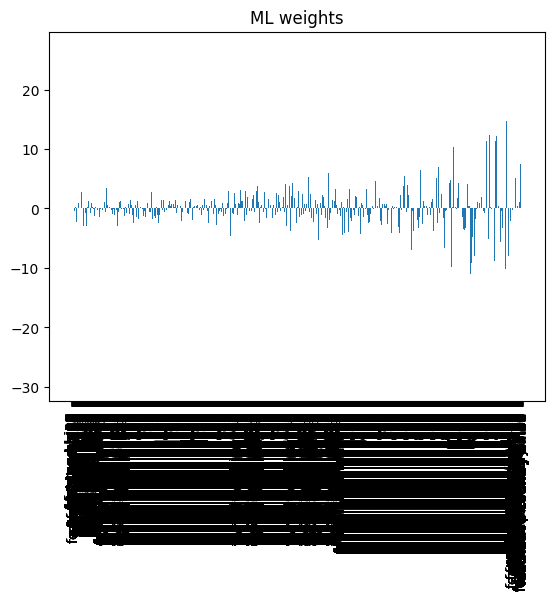

num of zero weights:  365
num of non-zero weights:  16509
                        Feature     Weight
0                  featage-bin1  -1.837779
1                  featage-bin2  -0.611996
2                  featage-bin3  -0.543226
3                  featage-bin4   2.271311
4                  featage-bin5   1.981509
...                         ...        ...
16829  feathours-per-week-bin88   4.728881
16830  feathours-per-week-bin89   6.235375
16831  feathours-per-week-bin90 -12.548861
16832  feathours-per-week-bin91   5.183553
16833  feathours-per-week-bin92   0.825118

[16509 rows x 2 columns]


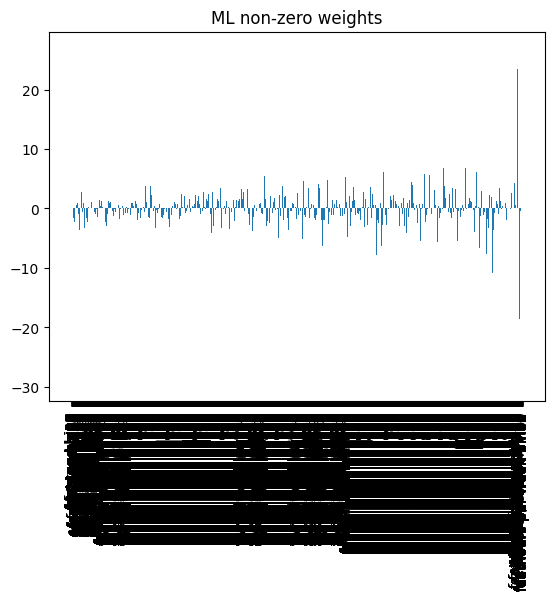


evaluate
encoding test set
X_disc shape:  (7541, 16874)
X_disc columns:  Index(['featage-bin1', 'featage-bin2', 'featage-bin3', 'featage-bin4',
       'featage-bin5', 'featage-bin6', 'featage-bin7', 'featage-bin8',
       'featage-bin9', 'featage-bin10',
       ...
       'featnative-country-bin31', 'featnative-country-bin32',
       'featnative-country-bin33', 'featnative-country-bin34',
       'featnative-country-bin35', 'featnative-country-bin36',
       'featnative-country-bin37', 'featnative-country-bin38',
       'featnative-country-bin39', 'featnative-country-bin40'],
      dtype='object', length=16874)
X_disc head:         featage-bin1  featage-bin2  featage-bin3  featage-bin4  featage-bin5  \
217               1             1             1             1             1   
24913             1             1             1             1             1   
17780             1             1             1             1             1   
12484             1             1             1    

In [41]:
start_time = time.time()
scorecard = Scorecard()
adult_infbins_diff_ml_model, adult_infbins_diff_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=77)
scorecard.evaluate()
end_time = time.time() 
print(f"Execution time: {end_time - start_time} seconds")

## mushroom
mushrooms described in terms of physical characteristics; classification: poisonous or edible

https://archive.ics.uci.edu/dataset/73/mushroom

num rows with nulls:  2480
num observations:  5644
num features:  22
target distribution:  poisonous
0    3488
1    2156
Name: count, dtype: int64


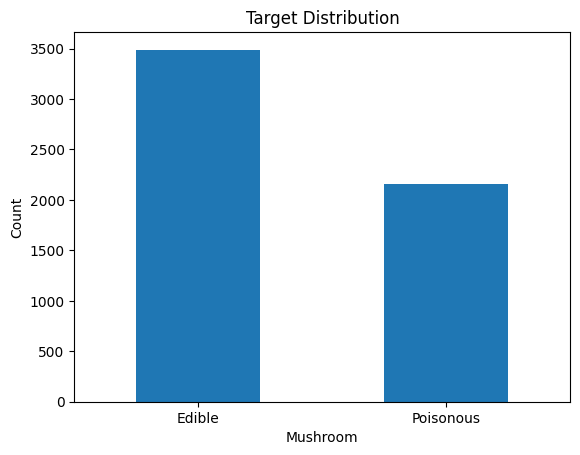

In [42]:
# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets.squeeze().map({'p': 1, 'e': 0}).astype(int)
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

# substitute '?' with NaN and drop rows with nulls
mushroom_combined = pd.concat([mushroom_X, mushroom_y], axis=1)
mushroom_combined = mushroom_combined.replace('?', pd.NA)
print("num rows with nulls: ", mushroom_combined.isnull().sum().sum())
mushroom_combined = mushroom_combined.dropna().reset_index(drop=True)
mushroom_X = mushroom_combined.iloc[:, :-1]
mushroom_y = mushroom_combined.iloc[:, -1]

print("num observations: ", mushroom_y.count())
print("num features: ", mushroom_X.shape[1])
print("target distribution: ", mushroom_y.value_counts())
# show target distribution
mushroom_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Mushroom')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'], rotation=0)
plt.show()

In [43]:
categorical_columns = mushroom_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mushroom_X[col] = mushroom_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mushroom_X[col].unique()}")

categorical columns:  ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Column cap-shape encoded as: [5 0 4 2 3 1]
Column cap-surface encoded as: [2 3 0 1]
Column cap-color encoded as: [4 7 6 3 2 5 0 1]
Column bruises encoded as: [1 0]
Column odor encoded as: [6 0 3 5 2 1 4]
Column gill-attachment encoded as: [1 0]
Column gill-spacing encoded as: [0 1]
Column gill-size encoded as: [1 0]
Column gill-color encoded as: [2 3 0 4 7 1 6 5 8]
Column stalk-shape encoded as: [0 1]
Column stalk-root encoded as: [2 1 0 3]
Column stalk-surface-above-ring encoded as: [2 0 1 3]
Column stalk-surface-below-ring encoded as: [2 0 3 1]
Column stalk-color-above-ring encoded as: [5 2 4 3 0 1 6]
Column


discretization thresholds

thresholds  {'cap-shape': ['0', '1', '2', '3', '4', '5'], 'cap-surface': ['0', '1', '2', '3'], 'cap-color': ['0', '1', '2', '3', '4', '5', '6', '7'], 'bruises': ['0', '1'], 'odor': ['0', '1', '2', '3', '4', '5', '6'], 'gill-attachment': ['0', '1'], 'gill-spacing': ['0', '1'], 'gill-size': ['0', '1'], 'gill-color': ['0', '1', '2', '3', '4', '5', '6', '7', '8'], 'stalk-shape': ['0', '1'], 'stalk-root': ['0', '1', '2', '3'], 'stalk-surface-above-ring': ['0', '1', '2', '3'], 'stalk-surface-below-ring': ['0', '1', '2', '3'], 'stalk-color-above-ring': ['0', '1', '2', '3', '4', '5', '6'], 'stalk-color-below-ring': ['0', '1', '2', '3', '4', '5', '6'], 'veil-type': ['0'], 'veil-color': ['0', '1'], 'ring-number': ['0', '1', '2'], 'ring-type': ['0', '1', '2', '3'], 'spore-print-color': ['0', '1', '2', '3', '4', '5'], 'population': ['0', '1', '2', '3', '4', '5'], 'habitat': ['0', '1', '2', '3', '4', '5']}
num of bins: 
  cap-shape: 6
  cap-surface: 4
  cap-color: 8
  br

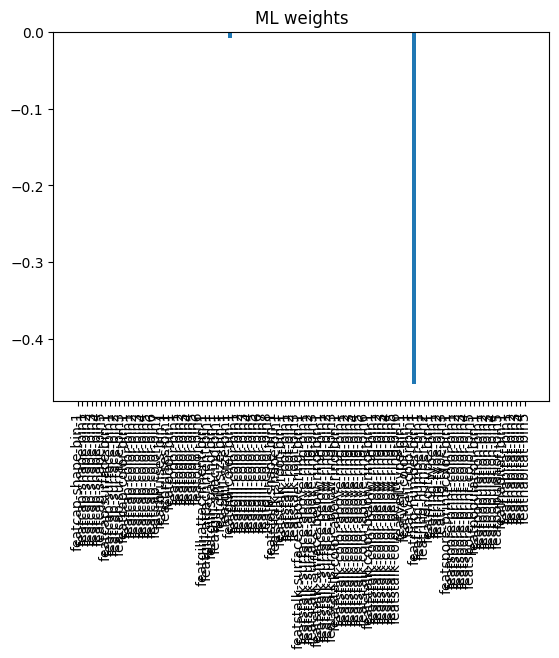

num of zero weights:  96
num of non-zero weights:  2
                  Feature    Weight
33   featgill-color-bin-1 -0.008251
73  featring-number-bin-1 -0.457830


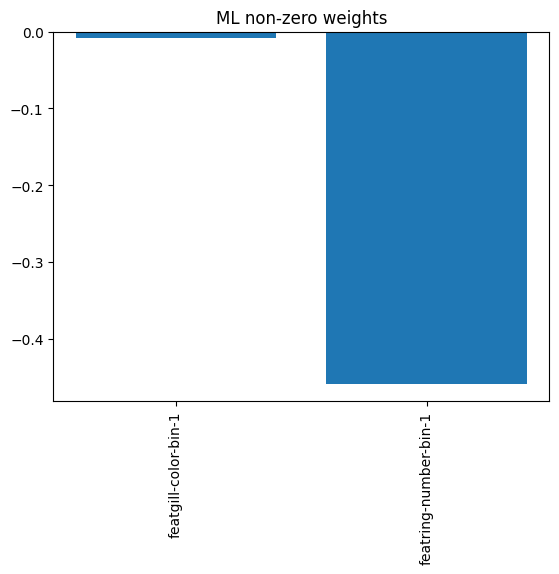


evaluate
encoding test set
X_disc shape:  (1411, 98)
X_disc columns:  Index(['featcap-shape-bin-1', 'featcap-shape-bin1', 'featcap-shape-bin2',
       'featcap-shape-bin3', 'featcap-shape-bin4', 'featcap-shape-bin5',
       'featcap-surface-bin-1', 'featcap-surface-bin1', 'featcap-surface-bin2',
       'featcap-surface-bin3', 'featcap-color-bin-1', 'featcap-color-bin1',
       'featcap-color-bin2', 'featcap-color-bin3', 'featcap-color-bin4',
       'featcap-color-bin5', 'featcap-color-bin6', 'featcap-color-bin7',
       'featbruises-bin-1', 'featbruises-bin1', 'featodor-bin-1',
       'featodor-bin1', 'featodor-bin2', 'featodor-bin3', 'featodor-bin4',
       'featodor-bin5', 'featodor-bin6', 'featgill-attachment-bin-1',
       'featgill-attachment-bin1', 'featgill-spacing-bin-1',
       'featgill-spacing-bin1', 'featgill-size-bin-1', 'featgill-size-bin1',
       'featgill-color-bin-1', 'featgill-color-bin1', 'featgill-color-bin2',
       'featgill-color-bin3', 'featgill-color-bin4', '

In [44]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_ml_model, mushroom_caim_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [45]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 2



discretization thresholds

thresholds  {'cap-shape': ['0', '1', '2', '3', '4', '5'], 'cap-surface': ['0', '1', '2', '3'], 'cap-color': ['0', '1', '2', '3', '4', '5', '6', '7'], 'bruises': ['0', '1'], 'odor': ['0', '1', '2', '3', '4', '5', '6'], 'gill-attachment': ['0', '1'], 'gill-spacing': ['0', '1'], 'gill-size': ['0', '1'], 'gill-color': ['0', '1', '2', '3', '4', '5', '6', '7', '8'], 'stalk-shape': ['0', '1'], 'stalk-root': ['0', '1', '2', '3'], 'stalk-surface-above-ring': ['0', '1', '2', '3'], 'stalk-surface-below-ring': ['0', '1', '2', '3'], 'stalk-color-above-ring': ['0', '1', '2', '3', '4', '5', '6'], 'stalk-color-below-ring': ['0', '1', '2', '3', '4', '5', '6'], 'veil-type': ['0'], 'veil-color': ['0', '1'], 'ring-number': ['0', '1', '2'], 'ring-type': ['0', '1', '2', '3'], 'spore-print-color': ['0', '1', '2', '3', '4', '5'], 'population': ['0', '1', '2', '3', '4', '5'], 'habitat': ['0', '1', '2', '3', '4', '5']}
num of bins: 
  cap-shape: 6
  cap-surface: 4
  cap-color: 8
  br

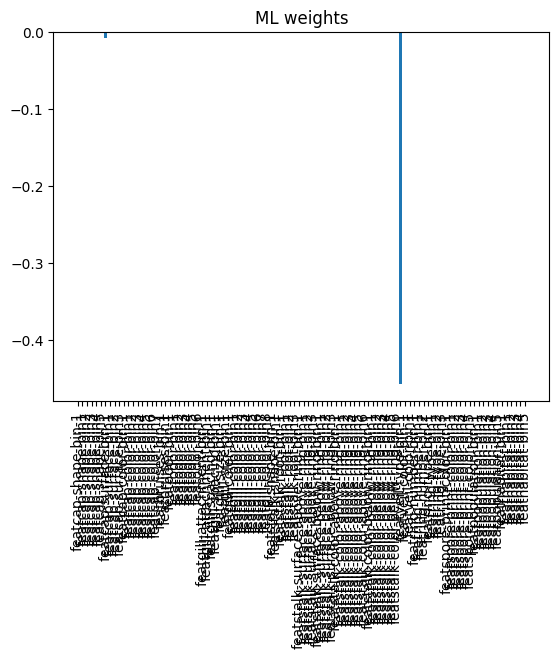

num of zero weights:  96
num of non-zero weights:  2
                  Feature    Weight
6   featcap-surface-bin-1 -0.008199
70    featveil-type-bin-1 -0.456886


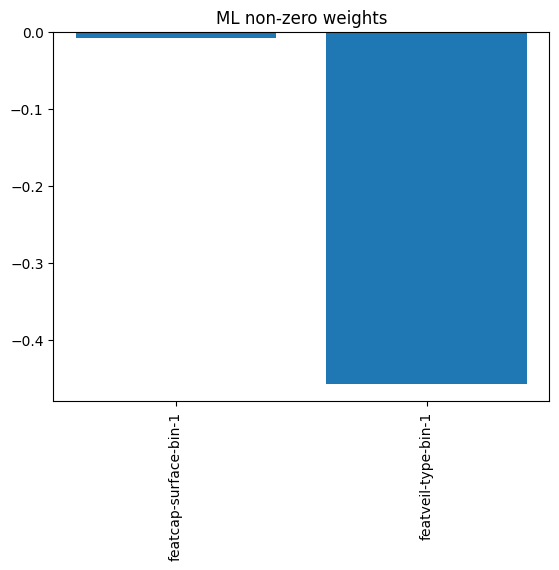


evaluate
encoding test set
X_disc shape:  (1411, 98)
X_disc columns:  Index(['featcap-shape-bin-1', 'featcap-shape-bin1', 'featcap-shape-bin2',
       'featcap-shape-bin3', 'featcap-shape-bin4', 'featcap-shape-bin5',
       'featcap-surface-bin-1', 'featcap-surface-bin1', 'featcap-surface-bin2',
       'featcap-surface-bin3', 'featcap-color-bin-1', 'featcap-color-bin1',
       'featcap-color-bin2', 'featcap-color-bin3', 'featcap-color-bin4',
       'featcap-color-bin5', 'featcap-color-bin6', 'featcap-color-bin7',
       'featbruises-bin-1', 'featbruises-bin1', 'featodor-bin-1',
       'featodor-bin1', 'featodor-bin2', 'featodor-bin3', 'featodor-bin4',
       'featodor-bin5', 'featodor-bin6', 'featgill-attachment-bin-1',
       'featgill-attachment-bin1', 'featgill-spacing-bin-1',
       'featgill-spacing-bin1', 'featgill-size-bin-1', 'featgill-size-bin1',
       'featgill-color-bin-1', 'featgill-color-bin1', 'featgill-color-bin2',
       'featgill-color-bin3', 'featgill-color-bin4', '

In [46]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_ml_model, mushroom_infbins_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


discretization thresholds

thresholds  {'cap-shape': ['0', '1', '2', '3', '4', '5'], 'cap-surface': ['0', '1', '2', '3'], 'cap-color': ['0', '1', '2', '3', '4', '5', '6', '7'], 'bruises': ['0', '1'], 'odor': ['0', '1', '2', '3', '4', '5', '6'], 'gill-attachment': ['0', '1'], 'gill-spacing': ['0', '1'], 'gill-size': ['0', '1'], 'gill-color': ['0', '1', '2', '3', '4', '5', '6', '7', '8'], 'stalk-shape': ['0', '1'], 'stalk-root': ['0', '1', '2', '3'], 'stalk-surface-above-ring': ['0', '1', '2', '3'], 'stalk-surface-below-ring': ['0', '1', '2', '3'], 'stalk-color-above-ring': ['0', '1', '2', '3', '4', '5', '6'], 'stalk-color-below-ring': ['0', '1', '2', '3', '4', '5', '6'], 'veil-type': ['0'], 'veil-color': ['0', '1'], 'ring-number': ['0', '1', '2'], 'ring-type': ['0', '1', '2', '3'], 'spore-print-color': ['0', '1', '2', '3', '4', '5'], 'population': ['0', '1', '2', '3', '4', '5'], 'habitat': ['0', '1', '2', '3', '4', '5']}
num of bins: 
  cap-shape: 6
  cap-surface: 4
  cap-color: 8
  br

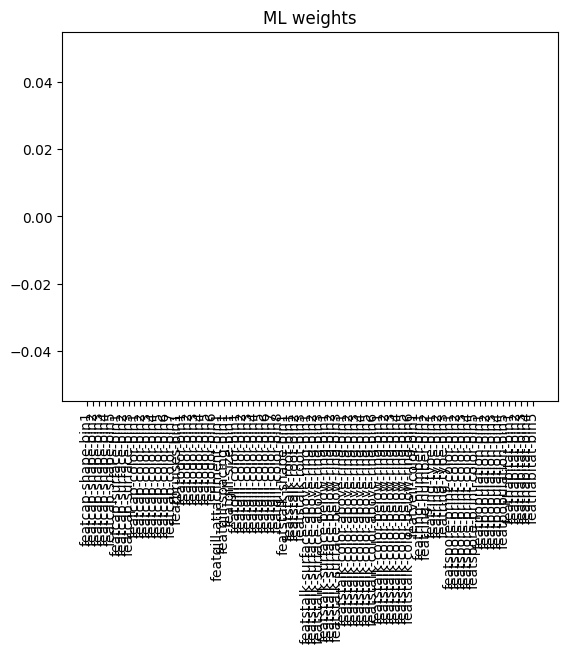

num of zero weights:  76
num of non-zero weights:  0
Empty DataFrame
Columns: [Feature, Weight]
Index: []


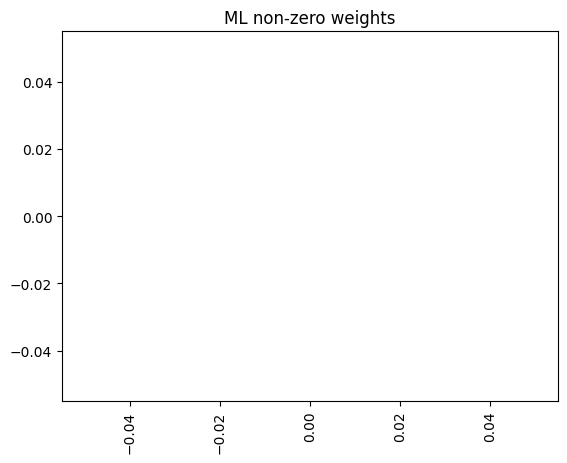


evaluate
encoding test set
X_disc shape:  (1411, 76)
X_disc columns:  Index(['featcap-shape-bin1', 'featcap-shape-bin2', 'featcap-shape-bin3',
       'featcap-shape-bin4', 'featcap-shape-bin5', 'featcap-surface-bin1',
       'featcap-surface-bin2', 'featcap-surface-bin3', 'featcap-color-bin1',
       'featcap-color-bin2', 'featcap-color-bin3', 'featcap-color-bin4',
       'featcap-color-bin5', 'featcap-color-bin6', 'featcap-color-bin7',
       'featbruises-bin1', 'featodor-bin1', 'featodor-bin2', 'featodor-bin3',
       'featodor-bin4', 'featodor-bin5', 'featodor-bin6',
       'featgill-attachment-bin1', 'featgill-spacing-bin1',
       'featgill-size-bin1', 'featgill-color-bin1', 'featgill-color-bin2',
       'featgill-color-bin3', 'featgill-color-bin4', 'featgill-color-bin5',
       'featgill-color-bin6', 'featgill-color-bin7', 'featgill-color-bin8',
       'featstalk-shape-bin1', 'featstalk-root-bin1', 'featstalk-root-bin2',
       'featstalk-root-bin3', 'featstalk-surface-above-rin

In [47]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diff_ml_model, mushroom_caim_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [48]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

Number of non-zero weights: 0



discretization thresholds

thresholds  {'cap-shape': ['0', '1', '2', '3', '4', '5'], 'cap-surface': ['0', '1', '2', '3'], 'cap-color': ['0', '1', '2', '3', '4', '5', '6', '7'], 'bruises': ['0', '1'], 'odor': ['0', '1', '2', '3', '4', '5', '6'], 'gill-attachment': ['0', '1'], 'gill-spacing': ['0', '1'], 'gill-size': ['0', '1'], 'gill-color': ['0', '1', '2', '3', '4', '5', '6', '7', '8'], 'stalk-shape': ['0', '1'], 'stalk-root': ['0', '1', '2', '3'], 'stalk-surface-above-ring': ['0', '1', '2', '3'], 'stalk-surface-below-ring': ['0', '1', '2', '3'], 'stalk-color-above-ring': ['0', '1', '2', '3', '4', '5', '6'], 'stalk-color-below-ring': ['0', '1', '2', '3', '4', '5', '6'], 'veil-type': ['0'], 'veil-color': ['0', '1'], 'ring-number': ['0', '1', '2'], 'ring-type': ['0', '1', '2', '3'], 'spore-print-color': ['0', '1', '2', '3', '4', '5'], 'population': ['0', '1', '2', '3', '4', '5'], 'habitat': ['0', '1', '2', '3', '4', '5']}
num of bins: 
  cap-shape: 6
  cap-surface: 4
  cap-color: 8
  br

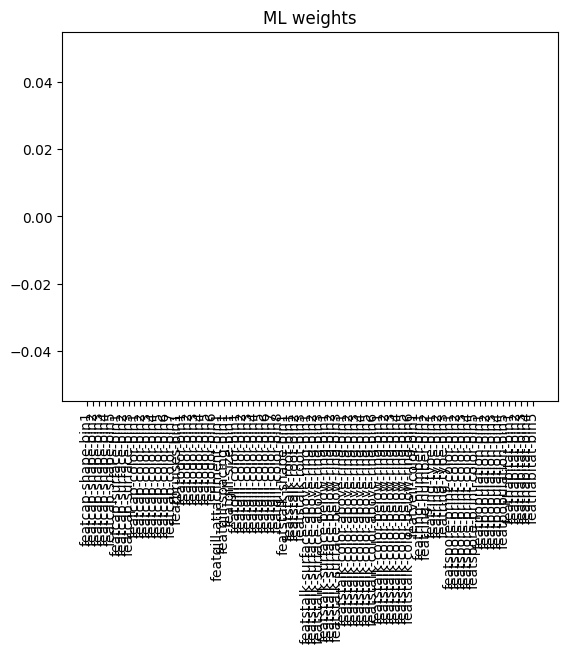

num of zero weights:  76
num of non-zero weights:  0
Empty DataFrame
Columns: [Feature, Weight]
Index: []


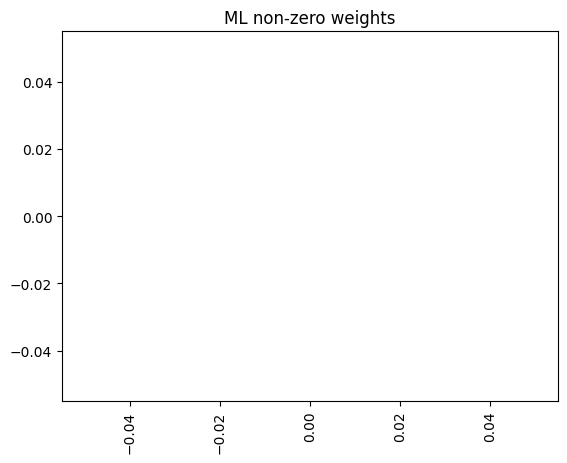


evaluate
encoding test set
X_disc shape:  (1411, 76)
X_disc columns:  Index(['featcap-shape-bin1', 'featcap-shape-bin2', 'featcap-shape-bin3',
       'featcap-shape-bin4', 'featcap-shape-bin5', 'featcap-surface-bin1',
       'featcap-surface-bin2', 'featcap-surface-bin3', 'featcap-color-bin1',
       'featcap-color-bin2', 'featcap-color-bin3', 'featcap-color-bin4',
       'featcap-color-bin5', 'featcap-color-bin6', 'featcap-color-bin7',
       'featbruises-bin1', 'featodor-bin1', 'featodor-bin2', 'featodor-bin3',
       'featodor-bin4', 'featodor-bin5', 'featodor-bin6',
       'featgill-attachment-bin1', 'featgill-spacing-bin1',
       'featgill-size-bin1', 'featgill-color-bin1', 'featgill-color-bin2',
       'featgill-color-bin3', 'featgill-color-bin4', 'featgill-color-bin5',
       'featgill-color-bin6', 'featgill-color-bin7', 'featgill-color-bin8',
       'featstalk-shape-bin1', 'featstalk-root-bin1', 'featstalk-root-bin2',
       'featstalk-root-bin3', 'featstalk-surface-above-rin

In [49]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diff_ml_model, mushroom_infbins_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## spambase
classifying Email as Spam or Non-Spam

https://archive.ics.uci.edu/dataset/94/spambase

num observations:  Class    4601
dtype: int64
num features:  57
target distribution:  Class
0        2788
1        1813
Name: count, dtype: int64


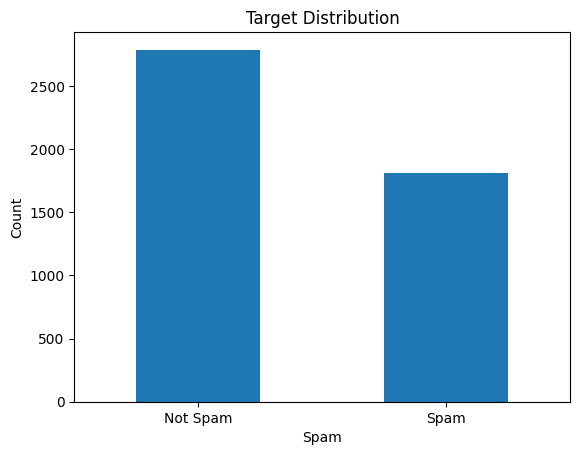

In [50]:
# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("num features: ", spambase_X.shape[1])
print("target distribution: ", spambase_y.value_counts())
# show target distribution
spambase_y['Class'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

In [51]:
categorical_columns = spambase_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    spambase_X[col] = spambase_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {spambase_X[col].unique()}")

categorical columns:  []



discretization thresholds
# 0  GLOBAL CAIM  772.4625150498797
# 1  GLOBAL CAIM  826.6955787102224
# 2  GLOBAL CAIM  846.558375392536
# 3  GLOBAL CAIM  660.3717499269646
# 4  GLOBAL CAIM  911.6755381475302
# 5  GLOBAL CAIM  825.118140954424
# 6  GLOBAL CAIM  1027.8708771929826
# 7  GLOBAL CAIM  858.5421284155809
# 8  GLOBAL CAIM  811.1672691574432
# 9  GLOBAL CAIM  801.3436502327901
# 10  GLOBAL CAIM  855.7852595278097
# 11  GLOBAL CAIM  677.2129769684043
# 12  GLOBAL CAIM  757.443427758682
# 13  GLOBAL CAIM  701.5349091178321
# 14  GLOBAL CAIM  776.4648001565777
# 15  GLOBAL CAIM  1034.0528405331315
# 16  GLOBAL CAIM  862.5298339561664
# 17  GLOBAL CAIM  806.7701173649372
# 18  GLOBAL CAIM  803.7930285714286
# 19  GLOBAL CAIM  810.2649435722357
# 20  GLOBAL CAIM  999.5476226188691
# 21  GLOBAL CAIM  681.6398962980129
# 22  GLOBAL CAIM  924.7677464221636
# 23  GLOBAL CAIM  969.8496644194906
# 24  GLOBAL CAIM  711.0667991087237
# 25  GLOBAL CAIM  691.4743975470531
# 26  GLOBAL CAIM  698

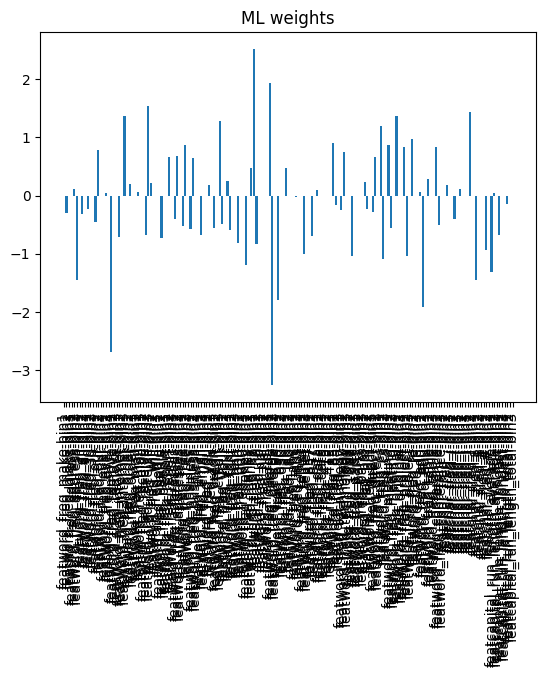

num of zero weights:  95
num of non-zero weights:  76
                                 Feature    Weight
1                featword_freq_make-bin2 -0.306516
4             featword_freq_address-bin2  0.112903
5             featword_freq_address-bin3 -1.456074
7                 featword_freq_all-bin2 -0.320480
9                  featword_freq_3d-bin1 -0.232838
..                                   ...       ...
160                 featchar_freq_#-bin2 -0.931369
162  featcapital_run_length_average-bin1 -1.320035
163  featcapital_run_length_average-bin2  0.042583
165  featcapital_run_length_longest-bin1 -0.672970
168    featcapital_run_length_total-bin1 -0.139003

[76 rows x 2 columns]


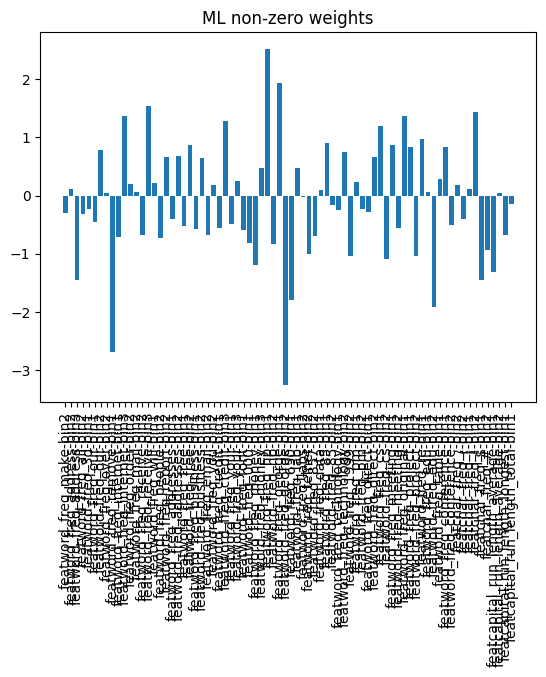


evaluate
encoding test set
X_disc shape:  (1151, 171)
X_disc columns:  Index(['featword_freq_make-bin1', 'featword_freq_make-bin2',
       'featword_freq_make-bin3', 'featword_freq_address-bin1',
       'featword_freq_address-bin2', 'featword_freq_address-bin3',
       'featword_freq_all-bin1', 'featword_freq_all-bin2',
       'featword_freq_all-bin3', 'featword_freq_3d-bin1',
       ...
       'featchar_freq_#-bin3', 'featcapital_run_length_average-bin1',
       'featcapital_run_length_average-bin2',
       'featcapital_run_length_average-bin3',
       'featcapital_run_length_longest-bin1',
       'featcapital_run_length_longest-bin2',
       'featcapital_run_length_longest-bin3',
       'featcapital_run_length_total-bin1',
       'featcapital_run_length_total-bin2',
       'featcapital_run_length_total-bin3'],
      dtype='object', length=171)
X_disc head:     featword_freq_make-bin1  featword_freq_make-bin2  featword_freq_make-bin3  \
0                        1                     

Traceback (most recent call last):
  File "/Users/mafaldacosta/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/wk/c98ddbnx3pd7fpdy174bcjmr0000gn/T/ipykernel_42298/556700040.py", line 8, in <module>
    scorecard.evaluate()
  File "/Users/mafaldacosta/Documents/opt-ordinal-scorecards/scorecard.py", line 362, in evaluate
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/core/frame.py", line 733, in __init__
    mgr = dict_to_mgr(data, index, columns, dtype=dtype, copy=copy, typ=manager)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/core/internals/construction.py", line 503, in dict_to_mgr
    return arrays_to_mgr(arrays, columns, index, dtype=dtype, typ=typ, consolidate=copy)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [52]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_ml_model, spambase_caim_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_infbins_1ook_ml_model, spambase_infbins_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_caim_diff_ml_model, spambase_caim_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diff_ml_model, spambase_infbins_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## telemarketing
set of possible advertisements on Internet pages

https://archive.ics.uci.edu/dataset/51/internet+advertisements

In [ ]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data', dtype=str)
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

telemarketing_y = telemarketing_y.map({'nonad.': 0, 'ad.': 1})

#  substitute '   ?' with NaN and drop rows with nulls
telemarketing_combined = pd.concat([telemarketing_X, telemarketing_y], axis=1)
telemarketing_combined = telemarketing_combined.replace('   ?', pd.NA)
print("num rows with nulls: ", telemarketing_combined.isnull().sum().sum())
telemarketing_combined = telemarketing_combined.dropna().reset_index(drop=True)
telemarketing_X = telemarketing_combined.iloc[:, :-1]
telemarketing_y = telemarketing_combined.iloc[:, -1]

print("num observations: ", telemarketing_y.count())
print("num features: ", telemarketing_X.shape[1])
print("target distribution: ", telemarketing_y.value_counts())
# show target distribution
telemarketing_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Telemarketing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ad', 'Ad'], rotation=0)
plt.show()

In [ ]:
categorical_columns = telemarketing_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    telemarketing_X[col] = telemarketing_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {telemarketing_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_ml_model, telemarketing_caim_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_ml_model, telemarketing_infbins_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diff_ml_model, telemarketing_caim_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diff_ml_model, telemarketing_infbins_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## breast cancer
predict if a breast tumor is malignant or benign

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

In [ ]:
# fetch dataset 
breast_cancer_data = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
breast_cancer_X = breast_cancer_data.data.features 
breast_cancer_y = breast_cancer_data.data.targets 

breast_cancer_y.loc[:,'Class'] = breast_cancer_y['Class'].map({4: 1, 2: 0})

# drop rows with nulls
breast_cancer_combined = pd.concat([breast_cancer_X, breast_cancer_y], axis=1)
print("num rows with nulls: ", breast_cancer_combined.isnull().sum().sum())
breast_cancer_combined = breast_cancer_combined.dropna()
breast_cancer_combined = breast_cancer_combined.reset_index(drop=True)
breast_cancer_X = breast_cancer_combined.iloc[:, :-1]
breast_cancer_y = breast_cancer_combined.iloc[:, -1]

# metadata 
# print(breast_cancer_data.metadata) 
  
# variable information 
# print(breast_cancer_data.variables) 

print("num observations: ", breast_cancer_y.count())
print("num features: ", breast_cancer_X.shape[1])
print("target distribution: ", breast_cancer_y.value_counts())
breast_cancer_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (benign)', '1 (malignant)'], rotation=0)
plt.show()


In [ ]:
categorical_columns = breast_cancer_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    breast_cancer_X[col] = breast_cancer_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {breast_cancer_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_ml_model, breast_cancer_caim_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_ml_model, breast_cancer_infbins_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diff_ml_model, breast_cancer_caim_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diff_ml_model, breast_cancer_infbins_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## tic tac toe
classify configurations of tic-tac-toe game as a win for "x" or not


https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame

In [ ]:
# fetch dataset 
tic_tac_toe_data = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
tic_tac_toe_X = tic_tac_toe_data.data.features 
tic_tac_toe_y = tic_tac_toe_data.data.targets 

tic_tac_toe_y.loc[:,'class'] = tic_tac_toe_y['class'].map({'positive': 1, 'negative': 0})
tic_tac_toe_y = tic_tac_toe_y.astype(int)

# metadata 
# print(tic_tac_toe_data.metadata) 
  
# variable information 
# print(tic_tac_toe_data.variables) 

print("num observations: ", tic_tac_toe_y.count())
print("num features: ", tic_tac_toe_X.shape[1])
print("target distribution: ", tic_tac_toe_y.value_counts())
tic_tac_toe_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('tic tac toe')
plt.ylabel('count')
plt.xticks([0, 1], ['negative', 'positive'], rotation=0)
plt.show()


In [ ]:
categorical_columns = tic_tac_toe_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    tic_tac_toe_X.loc[:, col] = tic_tac_toe_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {tic_tac_toe_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_1ook_ml_model, tic_tac_toe_caim_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_1ook_ml_model, tic_tac_toe_infbins_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_diff_ml_model, tic_tac_toe_caim_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_diff_ml_model, tic_tac_toe_infbins_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## sleep apnea
collection of clinical polysomnography (PSG) recordings. Beginning with PSG recordings from from ~19K patients evaluated at the Massachusetts General Hospital.

https://bdsp.io/content/hsp/2.0/#files

In [ ]:
sleep_apnea_data = pd.read_csv('../datasets/bdsp_psg_master_20231101.csv')

sleep_apnea_X = sleep_apnea_data.iloc[:, :-1]
sleep_apnea_y = sleep_apnea_data.iloc[:, -1]

print("num observations: ", sleep_apnea_y.count())
print("num features: ", sleep_apnea_X.shape[1])